<a href="https://colab.research.google.com/github/Iddhie/BlockchainDataset/blob/main/exampledf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Pattern Analysis for the 'Blockchain Wallet Segmentation of a Decentralized Exchange (UniSwap) Based on Trading Behaviour on the Ethereum Blockchain' Project**

## **Wallet addresses obtained from: UniSwap Sub-Graph**
## **Transaction History obtained from: etherscan API**


## **Content**

### **1. Dataset Preparation**
### **2. Visualization**
### **3. Sample Clustering Example**
### **4. Clustering Visualization**
### **5. Wallet Token Balances Dataset Visualization**


## **Importing Relevant Libraries and Defining Constants**


In [ ]:
from datetime import datetime
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from google.colab import drive
from google.colab import files
from pandas import json_normalize

ether_api_key='FVIGP2ZZX9I44Q1NTPW9BC1R2N5D8IPZWH'
covalent_api_key='cqt_rQDyw4jwV4WyGhyhYwXY3yPKY9hB'
ether_url='https://api.etherscan.io/api'
subgraph_url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'

## **Retrieving the Last 5,000 Coin Swaps in the UniSwap DeFi Platform using UniSwap Subgraph API**

**This is done in 5 iterations of the query due to The Graph API only allowing 1,000 in one request**

GraphQL is used to write the query below;

In [ ]:
query = '''
{
  swaps(first: 1000, orderBy: timestamp, orderDirection: desc) {
    timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD

    }
    amount1
    transaction {
      gasPrice
    }
  }
}
'''
headers = {
    'Content-Type': 'application/json',
}

# Make a POST request to the Uniswap v3 subgraph endpoint
response = requests.post(subgraph_url, json={'query': query}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df = pd.json_normalize(swaps_data)
    df = pd.DataFrame(df)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df['timestamp']=pd.to_numeric(df['timestamp'], errors='coerce').round(4)
df['amount0'] = pd.to_numeric(df['amount0'], errors='coerce').round(4)
df['amount1'] = pd.to_numeric(df['amount1'], errors='coerce').round(4)
df['amountUSD'] = pd.to_numeric(df['amountUSD'], errors='coerce').round(4)
df

Request failed with status code 410
{"message":"This endpoint has been removed. If you are the owner of this subgraph you can upgrade it by going here: https://thegraph.com/hosted-service. If you have any questions, reach out to support@thegraph.zendesk.com. Learn more about why this happening here: https://thegraph.com/docs/en/sunrise/#upgrading-subgraphs-to-the-graph-network"}


NameError: name 'df' is not defined

In [ ]:
query2 = '''
{
  swaps(first: 1000, where: {timestamp_lt: 1716368399}, orderBy: timestamp, orderDirection: desc) {
    timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}
'''


response = requests.post(subgraph_url, json={'query': query2}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']
    df2 = pd.json_normalize(swaps_data)
    df2 = pd.DataFrame(df2)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df2['timestamp']=pd.to_numeric(df2['timestamp'], errors='coerce').round(4)
df2['amount0'] = pd.to_numeric(df2['amount0'], errors='coerce').round(4)
df2['amount1'] = pd.to_numeric(df2['amount1'], errors='coerce').round(4)
df2['amountUSD'] = pd.to_numeric(df2['amountUSD'], errors='coerce').round(4)
df2

timestamp                                      origin   amountUSD  \
0    1716368387  0x9ab02cc61b294f0a430089449171e6bacf16c856  30000.0000   
1    1716368387  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13   4288.0445   
2    1716368387  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13   2674.2529   
3    1716368387  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13   4272.3512   
4    1716368387  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13   2168.2585   
..          ...                                         ...         ...   
995  1716367163  0xbb6b954b21f4a05a8b2451a8b87256435979fd63   1280.5718   
996  1716367163  0xbb6b954b21f4a05a8b2451a8b87256435979fd63   1279.5242   
997  1716367163  0xb98c6340a49cc87256435d7fbd795d95c8f25d11   2181.6988   
998  1716367163  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  16935.3808   
999  1716367163  0x91aae0aafd9d2d730111b395c6871f248d7bd728  14894.0402   

         amount0     amount1                                   token0.id  \
0    -33463.7448  30000.0000  0x6123b0049f904d730db3c36a31167d9d4121fa6b   
1    227966.1064     -1.1386  0x102c776ddb30c754ded4fdcc77a19230a60d4e4f   
2    142005.6729     -0.7101  0x102c776ddb30c754ded4fdcc77a19230a60d4e4f   
3         1.1341  -4273.7277  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
4     -4995.6006      0.5758  0x8248270620aa532e4d64316017be5e873e37cc09   
..           ...         ...                                         ...   
995   -1281.6195      0.3404  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
996   50777.0000     -0.3404  0x8355dbe8b0e275abad27eb843f3eaf3fc855e525   
997       5.1312     -0.5804  0x77e06c9eccf2e797fd462a92b6d7642ef85b0a44   
998       5.6272     -4.4985  0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2   
999       4.9490     -3.9562  0x9f8f72aa9304c8b593d555f12ef6589cc3a579a2   

    token0.symbol                       token0.feesUSD  \
0             RBN  14401831.87950451202253084460853094   
1             FLC  1670531.005690344919494030762536485   
2             FLC  1670531.005690344919494030762536485   
3            WETH  1680016489.902826972295290905536002   
4           DEVVE  239247.5913748116606269355041621288   
..            ...                                  ...   
995          USDC   645790111.678999396766702580048652   
996          WOOL  3139107.016769763137732397639557585   
997          wTAO  7628154.358574138849461129501905172   
998           MKR  10879466.29391526285524224364563586   
999           MKR  10879466.29391526285524224364563586   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    18099814.33300844234113396349586207  2041382409.912051835194074964517901   
1    26775246.49189497512675935374294643   871757818.642444193129236030516697   
2    26775246.49189497512675935374294643   871757818.642444193129236030516697   
3    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
4    307825.9538487391888518445218806609  79749197.12493722020897850138737704   
..                                   ...                                  ...   
995  661321075.2570170000000000000000002  744578770221.8856555248961655232811   
996  865326.6449932867528088360296994481  314497521.9065233642217916898488536   
997  12025142.82562018107944942866621338   1050666768.53045038217028618288362   
998  66802501.44611634761989709496590479  2897100751.048895645557924941625783   
999  66802501.44611634761989709496590479  2897100751.048895645557924941625783   

                                      token1.id token1.symbol  \
0    0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48          USDC   
1    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
2    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
3    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
4    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
..                                          ...           ...   
995  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
99

In [ ]:
query3 = '''
{
  swaps(first: 1000,
  where: {timestamp_lt: "1716367163"}
  orderBy: timestamp,
  orderDirection: desc
  ) {
    timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD

    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query3}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df3 = pd.json_normalize(swaps_data)
    df3 = pd.DataFrame(df3)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df3['timestamp']=pd.to_numeric(df3['timestamp'], errors='coerce').round(4)
df3['amount0'] = pd.to_numeric(df3['amount0'], errors='coerce').round(4)
df3['amount1'] = pd.to_numeric(df3['amount1'], errors='coerce').round(4)
df3['amountUSD'] = pd.to_numeric(df3['amountUSD'], errors='coerce').round(4)
df3

timestamp                                      origin   amountUSD  \
0    1716367151  0x97ae5b1b541f9c34ef750650c5e496beedf4e008    578.2302   
1    1716367151  0x97ae5b1b541f9c34ef750650c5e496beedf4e008    577.9957   
2    1716367151  0x2b1eacdc8462bcae3ed8603c09a30e14520bc604    420.0466   
3    1716367151  0x011dddd5b5470d2818bffb400b4e38949fe21ac3      0.1969   
4    1716367151  0x58a497019644d8c383c8d3764c32ffd43506e836  41688.0036   
..          ...                                         ...         ...   
995  1716365927  0x0028160d0048e1b9bdccf0b03405d3e32def3f5f    514.3677   
996  1716365927  0x0028160d0048e1b9bdccf0b03405d3e32def3f5f    514.7588   
997  1716365927  0x065e3dbafcb2c26a978720f9eb4bce6ad9d644a1   1149.6513   
998  1716365927  0x0832b4b6720fde9dee5f5c8cda99064046873f92      7.4923   
999  1716365927  0x7dcc00d0da47e6982672cb1c2481a6943737af45    787.6698   

          amount0       amount1                                   token0.id  \
0   -5.784647e+02  1.538000e-01  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
1    3.730635e+05 -1.538000e-01  0xa35923162c49cf95e6bf26623385eb431ad920d3   
2   -4.202171e+02  1.117000e-01  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
3    1.950462e+07 -1.000000e-04  0x9bf1d7d63dd7a4ce167cf4866388226eeefa702e   
4    5.958000e-01 -1.109760e+01  0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
..            ...           ...                                         ...   
995  3.790677e+07 -1.373000e-01  0x6982508145454ce325ddbe47a25d4ec3d2311933   
996  1.373000e-01 -5.151498e+02  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
997 -8.723431e+02  3.069000e-01  0x4d224452801aced8b2f0aebe155379bb5d594381   
998  2.000000e-03 -1.156232e+06  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
999 -2.933966e+02  2.103000e-01  0x0b38210ea11411557c13457d4da7dc6ea731b88a   

    token0.symbol                       token0.feesUSD  \
0            USDC   645790111.678999396766702580048652   
1           TURBO  5057858.355290506243284043601045155   
2            USDC   645790111.678999396766702580048652   
3             BEN  1739913.949214205931438048365030936   
4            WBTC  178573182.3385549167878069204278102   
..            ...                                  ...   
995          PEPE  16715776.34960553232340543545266273   
996          WETH  1680016489.902826972295290905536002   
997           APE  33862352.75907345753468711004692132   
998          WETH  1680016489.902826972295290905536002   
999          API3  194777.6909872999677250903934447426   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    661321075.2570170000000000000000002  744578770221.8856555248961655232811   
1    11475334.29928864592065259888430633  510413669.7448840028629810967865192   
2    661321075.2570170000000000000000002  744578770221.8856555248961655232811   
3    21877.13915718685390201989146444113  551954526.3734429216337408175331396   
4    392982652.6672433155107587576437471  119179609728.3097688130380050158585   
..                                   ...                                  ...   
995  124718808.4343972496013104138496211  4798583259.885339165419135800619677   
996  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
997  4269059.066085752832381408193394621  8813996157.021365168988523988785718   
998  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
999                                    0   61732644.3886165126887033996853212   

                                      token1.id token1.symbol  \
0    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
1    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
2    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
3    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
4    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
..                                          ...           ...   
995  0xc02aaa39b223fe8d0a0e5c4f

In [ ]:
query4 = '''
{
  swaps(
    first: 1000
    where: {timestamp_lt: "1716365927"}
    orderBy: timestamp
    orderDirection: desc
  ) {
 		timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query4}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df4 = pd.json_normalize(swaps_data)
    df4 = pd.DataFrame(df4)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df4['timestamp']=pd.to_numeric(df4['timestamp'], errors='coerce').round(4)
df4['amount0'] = pd.to_numeric(df4['amount0'], errors='coerce').round(4)
df4['amount1'] = pd.to_numeric(df4['amount1'], errors='coerce').round(4)
df4['amountUSD'] = pd.to_numeric(df4['amountUSD'], errors='coerce').round(4)
df4

timestamp                                      origin  amountUSD  \
0    1716365915  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  1632.7498   
1    1716365915  0x3eca3df0a212791c32f7ea3441a2d582bc00ec87    11.6032   
2    1716365915  0xc5d4ec9300be6da89a3db305c415c7cd3cbb7e8e  7490.6487   
3    1716365903  0x2b3707f1a7e56c7a5191330b18858a6671dac0f2   273.5370   
4    1716365903  0x2aaf62c95576b9244ef9c16f1145df8b92a91e39   259.9348   
..          ...                                         ...        ...   
995  1716364775  0xba9b1f9339cb29d04a45bfe88bab73b25f68d956   497.8272   
996  1716364775  0x472bf24bd2aed552d76c5e6a17a64b134890c390  1393.2537   
997  1716364775  0x472bf24bd2aed552d76c5e6a17a64b134890c390  1391.1630   
998  1716364775  0x8bb56282d423f3f24bda3a6f5d94da3e92d20750   185.6353   
999  1716364775  0x8bb56282d423f3f24bda3a6f5d94da3e92d20750   185.5086   

          amount0       amount1                                   token0.id  \
0   -6.067723e+02  4.358000e-01  0x0b38210ea11411557c13457d4da7dc6ea731b88a   
1    2.780400e+01 -3.100000e-03  0x111111111117dc0aa78b770fa6a738034120c302   
2    2.509832e+04 -1.999600e+00  0x037a54aab062628c9bbae1fdb1583c195585fe41   
3   -7.300000e-02  9.340841e+06  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
4   -4.143670e+01  6.940000e-02  0x582d872a1b094fc48f5de31d3b73f2d9be47def1   
..            ...           ...                                         ...   
995 -1.422116e+03  1.328000e-01  0x89d584a1edb3a70b3b07963f9a3ea5399e38b136   
996  1.016829e+08 -3.717000e-01  0x6982508145454ce325ddbe47a25d4ec3d2311933   
997 -1.990000e-02  3.717000e-01  0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
998 -1.855086e+02  4.960000e-02  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
999  1.855086e+02 -1.031138e+04  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   

    token0.symbol                       token0.feesUSD  \
0            API3  194777.6909872999677250903934447426   
1           1INCH   11520378.5604114895299004891441343   
2             LCX  4693427.441891316128497178357458909   
3            WETH  1680016489.902826972295290905536002   
4         TONCOIN  2992402.915246137514333115853798005   
..            ...                                  ...   
995           AIT  61692.32699578623445018906676452782   
996          PEPE  16715776.34960553232340543545266273   
997          WBTC  178573182.3385549167878069204278102   
998          USDC   645790111.678999396766702580048652   
999          USDC   645790111.678999396766702580048652   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0                                      0   61732644.3886165126887033996853212   
1    5246213.602870078465193373828958145  1649497058.102438786010397210257057   
2    6787966.501427270954305202635504569  469905940.9512271259902739908343163   
3    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
4    8119629.762621530188821846574565407  322724709.2680053109553112268947228   
..                                   ...                                  ...   
995                                    0   19414638.6603691127651983426339928   
996  124718808.4343972496013104138496211  4798583259.885339165419135800619677   
997  392982652.6672433155107587576437471  119179609728.3097688130380050158585   
998  661321075.2570170000000000000000002  744578770221.8856555248961655232811   
999  661321075.2570170000000000000000002  744578770221.8856555248961655232811   

                                      token1.id token1.symbol  \
0    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
1    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
2    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
3    0xd2877702675e6ceb975b4a1dff9fb7baf4c91ea9          LUNA   
4    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
..                                          ...           ...   
995  0xc02aaa39b223fe8d0a0e5c4f27ead9083c75

In [ ]:
query5 = '''
{
  swaps(
    first: 1000
    where: {timestamp_lt: "1716364775"}
    orderBy: timestamp
    orderDirection: desc

  ) {
 		timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query5}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df5 = pd.json_normalize(swaps_data)
    df5 = pd.DataFrame(df5)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df5['timestamp']=pd.to_numeric(df5['timestamp'], errors='coerce').round(4)
df5['amount0'] = pd.to_numeric(df5['amount0'], errors='coerce').round(4)
df5['amount1'] = pd.to_numeric(df5['amount1'], errors='coerce').round(4)
df5['amountUSD'] = pd.to_numeric(df5['amountUSD'], errors='coerce').round(4)
df5

timestamp                                      origin    amountUSD  \
0    1716364763  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  180078.9430   
1    1716364763  0xd985591993fa6e42f4355cef80ccbaff6a5eba60    9999.7500   
2    1716364763  0x55da8d3a4351ee31269486fcdb3037210bb89360      20.8449   
3    1716364763  0x55da8d3a4351ee31269486fcdb3037210bb89360      20.8153   
4    1716364763  0x55da8d3a4351ee31269486fcdb3037210bb89360      20.8746   
..          ...                                         ...          ...   
995  1716363539  0x0d3ff932eca2375ffcdf778950486d4abb4e1d1d     997.2917   
996  1716363527  0xa47be2bd9e8a69bba338a9a490550b9da8159699  119957.7230   
997  1716363527  0xa47be2bd9e8a69bba338a9a490550b9da8159699   82780.7823   
998  1716363527  0x91aae0aafd9d2d730111b395c6871f248d7bd728    2021.4514   
999  1716363527  0xe743a49f04f2f77eb2d3b753ae3ad599de8cea84    3745.9382   

         amount0     amount1                                   token0.id  \
0   -179971.0173     48.0750  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
1     10000.0000  -9999.5000  0x6b175474e89094c44da98b954eedeac495271d0f   
2         0.0056    -20.8153  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
3        -8.8905     20.8153  0x26ebb8213fb8d66156f1af8908d43f7e3e367c1d   
4        -0.0056     48.6202  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
..           ...         ...                                         ...   
995    -996.4373    997.2917  0x4c9edd5852cd905f086c759e8383e09bff1e68b3   
996 -119971.7261     32.0000  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
997      22.0800 -82800.3980  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
998    -542.6871      0.5393  0x04fa0d235c4abf4bcf4787af4cf447de572ef828   
999    3748.0476     -0.9988  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   

    token0.symbol                       token0.feesUSD  \
0            USDC   645790111.678999396766702580048652   
1             DAI  72311136.68123974325443168786546503   
2            WETH  1680016489.902826972295290905536002   
3           RETIK  33004.50019082955508985967366685831   
4            WETH  1680016489.902826972295290905536002   
..            ...                                  ...   
995          USDe  526510.5741490230993323784921084844   
996          USDC   645790111.678999396766702580048652   
997          WETH  1680016489.902826972295290905536002   
998           UMA  797726.6888370696517493713370139344   
999          USDC   645790111.678999396766702580048652   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    661321075.2570170000000000000000002  744578770221.8856555248961655232811   
1           139320209.676685209123708186  82681077440.93568904157231729142027   
2    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
3    427887.7465225305262912672908863008   11001500.0636098516966198912222861   
4    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
..                                   ...                                  ...   
995  5491241.766239918776520600403003109  5265105741.490230993323784921084844   
996  661321075.2570170000000000000000002  744578770221.8856555248961655232811   
997  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
998  482928.1726087896976063359345180031  264555363.8655078998625736640366649   
999  661321075.2570170000000000000000002  744578770221.8856555248961655232811   

                                      token1.id token1.symbol  \
0    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
1    0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48          USDC   
2    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
3    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
4    0xdc9cb148ecb70876db0abeb92f515a5e1dc9f580          GBTC   
..                                          ...           ...   
995  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48        

In [ ]:
query6 = '''
{
  swaps(
    first: 1000
    where: {timestamp_lt: "1716363527"}
    orderBy: timestamp
    orderDirection: desc

  ) {
 		timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query6}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df6 = pd.json_normalize(swaps_data)
    df6 = pd.DataFrame(df6)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df6['timestamp']=pd.to_numeric(df6['timestamp'], errors='coerce').round(4)
df6['amount0'] = pd.to_numeric(df6['amount0'], errors='coerce').round(4)
df6['amount1'] = pd.to_numeric(df6['amount1'], errors='coerce').round(4)
df6['amountUSD'] = pd.to_numeric(df6['amountUSD'], errors='coerce').round(4)
df6

timestamp                                      origin  amountUSD  \
0    1716363515  0x26278330bc36da6f878448a03a64c69ae9f8de89  9972.2141   
1    1716363515  0x26278330bc36da6f878448a03a64c69ae9f8de89  9974.1065   
2    1716363515  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13     8.6942   
3    1716363515  0x3a2a5b87e49de9f724f8de08eeaa0a7fdeda5ffd     7.4965   
4    1716363515  0x5da5984ccef49675fade8311bae789c6bfa667c4   258.0002   
..          ...                                         ...        ...   
995  1716362255  0x8b8988ce1b6022a41f4e58d219669b936ce593b3    98.0602   
996  1716362255  0x8b8988ce1b6022a41f4e58d219669b936ce593b3    98.0459   
997  1716362255  0x0237181ae2d655decb0b548872eb746437dc29c6  1657.4529   
998  1716362255  0xeb6e5b0bf76fab8f24a71d18453672a0be756832   559.0067   
999  1716362255  0x9b94594a5208eb48fb6864078807126d92c4f830     9.4009   

        amount0    amount1                                   token0.id  \
0    -9974.1065     2.6600  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
1   -46643.5511  9974.1065  0x8881562783028f5c1bcb985d2283d5e170d88888   
2       40.9023    -8.6942  0x8881562783028f5c1bcb985d2283d5e170d88888   
3      -85.6124     0.0020  0x8cefbeb2172a9382753de431a493e21ba9694004   
4        0.0685    -0.0688  0xa1290d69c65a6fe4df752f95823fae25cb99e5a7   
..          ...        ...                                         ...   
995     -0.0261    98.0459  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
996      1.0000   -98.0459  0x8dd09822e83313adca54c75696ae80c5429697ff   
997    182.0611 -1657.4529  0x14778860e937f509e651192a90589de711fb88a9   
998      0.1487  -558.8971  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
999   -336.3758     0.0025  0xb131f4a55907b10d1f0a50d8ab8fa09ec342cd74   

    token0.symbol                       token0.feesUSD  \
0            USDC   645790111.678999396766702580048652   
1            SHFL                     355003.046319534   
2            SHFL                     355003.046319534   
3         MELANIA  14929.22668700818714199947244676297   
4           rsETH  190467.8361566251995351349456094205   
..            ...                                  ...   
995          WETH  1680016489.902826972295290905536002   
996          Sifu  21949.27539549004119371101066835238   
997         CYBER  136515.7120843280121841679148074965   
998          WETH  1680016489.902826972295290905536002   
999          MEME  1614909.584582400233098902645880799   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    661321075.2570170000000000000000002  744578770221.8856555248961655232811   
1    4469792.868165789458679723984501982                     118334211.911404   
2    4469792.868165789458679723984501982                     118334211.911404   
3                                      0  1492922.668700818714199947244676297   
4    2523793.290824750901375926680799436  242202569.6287498925281126689418765   
..                                   ...                                  ...   
995  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
996                                    0  2194927.539549004119371101066835238   
997                                    0   13699229.9079885018110824684539108   
998  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
999  1351299.486017200916936479487004083  362242586.0626758234900692414796452   

                                      token1.id token1.symbol  \
0    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
1    0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48          USDC   
2    0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48          USDC   
3    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
4    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
..                                          ...           ...   
995  0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
996  0xdac17f958d2ee523a2206206994597c

In [ ]:
query7 = '''
{
  swaps(
    first: 1000
    where: {timestamp_lt: "1716362255"}
    orderBy: timestamp
    orderDirection: desc
  ) {
 		timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query7}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df7 = pd.json_normalize(swaps_data)
    df7 = pd.DataFrame(df7)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df7['timestamp']=pd.to_numeric(df7['timestamp'], errors='coerce').round(4)
df7['amount0'] = pd.to_numeric(df7['amount0'], errors='coerce').round(4)
df7['amount1'] = pd.to_numeric(df7['amount1'], errors='coerce').round(4)
df7['amountUSD'] = pd.to_numeric(df7['amountUSD'], errors='coerce').round(4)
df7

timestamp                                      origin   amountUSD  \
0    1716362243  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef   1525.8676   
1    1716362243  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef   1527.4123   
2    1716362243  0x4f801ed328879c4fd2ff6c3b5a1ff5036e527cd3    291.0097   
3    1716362243  0x4f801ed328879c4fd2ff6c3b5a1ff5036e527cd3    290.8996   
4    1716362243  0x4f801ed328879c4fd2ff6c3b5a1ff5036e527cd3    291.1198   
..          ...                                         ...         ...   
995  1716360923  0x4391aded77c807190a20fe622abf6cd9e4be5312     44.5299   
996  1716360923  0x9eb9e9b2ba5c2665a16beaa8e137410358b6beaf  56283.8748   
997  1716360923  0x1d95430268dea1f8fc2b50a66848b22ae9225b00     18.7493   
998  1716360911  0xe3cdfc9e357f8f378b31ef8f930bf7e423285176     99.9674   
999  1716360911  0xe3cdfc9e357f8f378b31ef8f930bf7e423285176    100.0096   

          amount0     amount1                                   token0.id  \
0   -2.180000e-02      0.4060  0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
1    1.528000e+03     -0.4060  0x6b175474e89094c44da98b954eedeac495271d0f   
2   -2.908996e+02      0.0774  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
3   -2.005000e+03    290.8996  0x8fe815417913a93ea99049fc0718ee1647a2a07c   
4    3.557462e+05     -0.0774  0x594daad7d77592a2b97b725a7ad59d7e188b5bfa   
..            ...         ...                                         ...   
995  7.069200e+00     -0.0118  0x582d872a1b094fc48f5de31d3b73f2d9be47def1   
996 -1.496440e+01  56296.4865  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
997 -9.107800e+00     18.7493  0x26ebb8213fb8d66156f1af8908d43f7e3e367c1d   
998 -9.992520e+01      0.0266  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
999  7.351580e+06     -0.0266  0x6982508145454ce325ddbe47a25d4ec3d2311933   

    token0.symbol                       token0.feesUSD  \
0            WBTC  178573182.3385549167878069204278102   
1             DAI  72311136.68123974325443168786546503   
2            USDC   645790111.678999396766702580048652   
3           XSWAP                       19381.72719645   
4             APU  366098.8374792174688872840855369733   
..            ...                                  ...   
995       TONCOIN  2992402.915246137514333115853798005   
996          WETH  1680016489.902826972295290905536002   
997         RETIK  33004.50019082955508985967366685831   
998          USDC   645790111.678999396766702580048652   
999          PEPE  16715776.34960553232340543545266273   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    392982652.6672433155107587576437471  119179609728.3097688130380050158585   
1           139320209.676685209123708186  82681077440.93568904157231729142027   
2    661321075.2570170000000000000000002  744578770221.8856555248961655232811   
3                                      0                       1938172.719645   
4    3145183.181306921954406627424863623  36841162.60900328834927053197400811   
..                                   ...                                  ...   
995  8119629.762621530188821846574565407  322724709.2680053109553112268947228   
996  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
997  427887.7465225305262912672908863008   11001500.0636098516966198912222861   
998  661321075.2570170000000000000000002  744578770221.8856555248961655232811   
999  124718808.4343972496013104138496211  4798583259.885339165419135800619677   

                                      token1.id token1.symbol  \
0    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
1    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
2    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
3    0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48          USDC   
4    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
..                                          ...           ...   
995  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2        

In [ ]:
query8 = '''
{
  swaps(
    first: 1000
    where: {timestamp_lt: "1716360911"}
    orderBy: timestamp
    orderDirection: desc
  ) {
 		timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query8}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df8 = pd.json_normalize(swaps_data)
    df8 = pd.DataFrame(df8)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df8['timestamp']=pd.to_numeric(df8['timestamp'], errors='coerce').round(4)
df8['amount0'] = pd.to_numeric(df8['amount0'], errors='coerce').round(4)
df8['amount1'] = pd.to_numeric(df8['amount1'], errors='coerce').round(4)
df8['amountUSD'] = pd.to_numeric(df8['amountUSD'], errors='coerce').round(4)
df8

timestamp                                      origin   amountUSD  \
0    1716360887  0x009d13e9bec94bf16791098ce4e5c168d27a9f07    488.8450   
1    1716360887  0xbaa3ef11659d347aae75c7bb67e29f1f8bb90843  64060.3174   
2    1716360887  0x8b04c1f80481b81e3852e28443f06bf22efe3e6c    108.6270   
3    1716360887  0xdf3504e9d05e54197f5d6db864194b199258571d    371.5929   
4    1716360887  0xfe0c760cbcb9da239b9ba805f0aeaed3be84f65a    414.8975   
..          ...                                         ...         ...   
995  1716359639  0x9416e6f9b0c64f65e5320f54d185b28cdc13d956   1128.1251   
996  1716359639  0x4066e9bd5618373d2da7a1cb7bba03ef800875ee   1543.8021   
997  1716359639  0x4066e9bd5618373d2da7a1cb7bba03ef800875ee    450.0152   
998  1716359639  0x1d34cbe5c53684ed82ffe5253b92c128edcd6525    639.0089   
999  1716359639  0x1d34cbe5c53684ed82ffe5253b92c128edcd6525    638.7468   

          amount0   amount1                                   token0.id  \
0    1.525581e+04   -0.1300  0x48c3399719b582dd63eb5aadf12a40b4c3f52fa2   
1    9.171000e-01  -17.0432  0x2260fac5e5542a773aa44fbcfedf7c193bc2c599   
2   -5.553800e+00    0.0289  0xb23d80f5fefcddaa212212f028021b41ded428cf   
3    1.707671e+04   -0.0988  0x289ff00235d2b98b0145ff5d4435d3e92f9540a6   
4    3.526840e+04   -0.1103  0x9c354503c38481a7a7a51629142963f98ecc12d0   
..            ...       ...                                         ...   
995 -1.795407e+06    0.3000  0x20d4db1946859e2adb0e5acc2eac58047ad41395   
996 -9.149297e+02    0.4105  0x069d89974f4edabde69450f9cf5cf7d8cbd2568d   
997 -2.669264e+02    0.1197  0x069d89974f4edabde69450f9cf5cf7d8cbd2568d   
998  1.700000e-01 -638.7468  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
999 -3.223224e+02  638.7468  0x26ebb8213fb8d66156f1af8908d43f7e3e367c1d   

    token0.symbol                       token0.feesUSD  \
0           SWISE  463727.6010694969936523541771966566   
1            WBTC  178573182.3385549167878069204278102   
2           PRIME   5263795.88569661663275140774583772   
3            BOOE  26968.30811781250825198597950480335   
4             OGV  81494.78184139121169405612941969589   
..            ...                                  ...   
995        MOONEY  1776343.500891691376942025453211272   
996           BVM  1643477.207352956436530579652039098   
997           BVM  1643477.207352956436530579652039098   
998          WETH  1680016489.902826972295290905536002   
999         RETIK  33004.50019082955508985967366685831   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    2511298.637942214252906156780555983  53392055.32641149519884265126770506   
1    392982652.6672433155107587576437471  119179609728.3097688130380050158585   
2    14728547.99591940182948883641658849  948124800.5053081409958050121589444   
3                                      0  2696830.811781250825198597950480335   
4                                      0  27164344.23961840389801870980656564   
..                                   ...                                  ...   
995   159645.916090835127903172032155341  178153651.1213714320518518783929026   
996  3047263.549484790532976475388698637  547825735.7843188121768598840130161   
997  3047263.549484790532976475388698637  547825735.7843188121768598840130161   
998  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
999  427887.7465225305262912672908863008   11001500.0636098516966198912222861   

                                      token1.id token1.symbol  \
0    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
1    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
2    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
3    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
4    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
..                                          ...           ...   
995  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
996  0xc02aaa3

In [ ]:
query9 = '''
{
  swaps(
    first: 1000
    where: {timestamp_lt: "1716359639"}
    orderBy: timestamp
    orderDirection: desc
  ) {
 		timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query9}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df9 = pd.json_normalize(swaps_data)
    df9 = pd.DataFrame(df9)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df9['timestamp']=pd.to_numeric(df9['timestamp'], errors='coerce').round(4)
df9['amount0'] = pd.to_numeric(df9['amount0'], errors='coerce').round(4)
df9['amount1'] = pd.to_numeric(df9['amount1'], errors='coerce').round(4)
df9['amountUSD'] = pd.to_numeric(df9['amountUSD'], errors='coerce').round(4)
df9

timestamp                                      origin   amountUSD  \
0    1716359627  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4    545.2605   
1    1716359627  0x8518c521eba4e725f227a930014a997bf613d5c5    840.2066   
2    1716359627  0x8ea962c3bfde317186d3673646e4aee33e676e90   2161.2710   
3    1716359627  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13  53190.2215   
4    1716359627  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13  53166.8547   
..          ...                                         ...         ...   
995  1716358403  0x5bd1a979de63576153d5b116f1d43f10ce6f1fb3    998.8868   
996  1716358403  0xd1b12d3ce53a2aaa867dd1154c1ad7bd3c470f3c   3976.6115   
997  1716358403  0x065e3dbafcb2c26a978720f9eb4bce6ad9d644a1   4205.1352   
998  1716358403  0xdd4200e58eab295aa09a5ed48a695a5e7d4d0f3b    676.9134   
999  1716358403  0x4c32a63a73f789654c0bd670fddeae18f16aab61    394.8947   

          amount0       amount1                                   token0.id  \
0    1.450000e-01 -6.617037e+04  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
1    1.367224e+06 -2.234000e-01  0x20d4db1946859e2adb0e5acc2eac58047ad41395   
2    5.747000e-01 -1.675253e+07  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
3   -1.418460e+01  5.304045e+04  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
4    1.417220e+01 -5.304046e+04  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
..            ...           ...                                         ...   
995 -2.735605e+03  2.656000e-01  0x8143182a775c54578c8b7b3ef77982498866945d   
996 -8.642015e+04  1.057500e+00  0x8290333cef9e6d528dd5618fb97a76f268f3edd4   
997 -1.118300e+00  1.977558e+02  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
998 -6.769518e+02  1.800000e-01  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
999 -5.098512e+04  1.050000e-01  0x4a029f7bcf33acb03547d8fa7be840347973e24e   

    token0.symbol                       token0.feesUSD  \
0            WETH  1680016489.902826972295290905536002   
1          MOONEY  1776343.500891691376942025453211272   
2            WETH  1680016489.902826972295290905536002   
3            WETH  1680016489.902826972295290905536002   
4            WETH  1680016489.902826972295290905536002   
..            ...                                  ...   
995         wQUIL  933709.5972480017826783052060271982   
996          ANKR  237592.5239579227875103511933628741   
997          WETH  1680016489.902826972295290905536002   
998          USDC   645790111.678999396766702580048652   
999         MAZZE  848641.9227794206506353412461344225   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
1     159645.916090835127903172032155341  178153651.1213714320518518783929026   
2    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
3    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
4    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
..                                   ...                                  ...   
995  3911259.423561347577324412289950211  93370959.72480017826783052060271982   
996  428889.2844669616265821418822711189  78454323.91787852168373391729727513   
997  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
998  661321075.2570170000000000000000002  744578770221.8856555248961655232811   
999  1231399.623751945457852053799358856  84864192.27794206506353412461344225   

                                      token1.id token1.symbol  \
0    0xc0db17bc219c5ca8746c29ee47862ee3ad742f4a        SCOTTY   
1    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
2    0xd29da236dd4aac627346e1bba06a619e8c22d7c5          MAGA   
3    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
4    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
..                                          ...           ...   
995  0xc02aaa39b223fe8d0a0e5c4f

In [ ]:
query10 = '''
{
  swaps(
    first: 1000
    where: {timestamp_lt: "1716358403"}
    orderBy: timestamp
    orderDirection: desc
  ) {
 		timestamp
    origin
    amountUSD
    token0 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount0
    token1 {
      id
      symbol
      feesUSD
      totalValueLockedUSD
      volumeUSD
    }
    amount1
    transaction {
      gasPrice
    }
  }
}'''

response = requests.post(subgraph_url, json={'query': query10}, headers=headers)

if response.status_code == 200:
    data = response.json()
    swaps_data = data['data']['swaps']

    df10 = pd.json_normalize(swaps_data)
    df10 = pd.DataFrame(df10)
else:
    print(f"Request failed with status code {response.status_code}")
    print(response.text)

df10['timestamp']=pd.to_numeric(df10['timestamp'], errors='coerce').round(4)
df10['amount0'] = pd.to_numeric(df10['amount0'], errors='coerce').round(4)
df10['amount1'] = pd.to_numeric(df10['amount1'], errors='coerce').round(4)
df10['amountUSD'] = pd.to_numeric(df10['amountUSD'], errors='coerce').round(4)
df10

timestamp                                      origin    amountUSD  \
0    1716358391  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05     118.3847   
1    1716358391  0xbaa3ef11659d347aae75c7bb67e29f1f8bb90843  140646.9356   
2    1716358391  0x6bcf3645abc216f00fdf1cd24947dd072ddc3b99     403.0465   
3    1716358391  0x51301f41c8f83fbdffaeee11f846e9c114fb8046   55833.1445   
4    1716358391  0x9797cc4e82c0fd57690bf48f0d1e52cf03c3131d     648.4823   
..          ...                                         ...          ...   
995  1716357275  0x467e34b3f40298364cf506636be5a3b1be50d0eb   15898.0505   
996  1716357275  0x70ad6a24abd247fce9b87b2e85972049cc0170ad   10016.4930   
997  1716357275  0x23782358d23276e1a9cf5104fa82268afb024d36      22.0182   
998  1716357275  0x43ae1150c268b7aae2d86e413da80ae95eb8006d     999.7897   
999  1716357275  0xae2fc483527b8ef99eb5d9b44875f005ba1fae13  172001.2206   

         amount0       amount1                                   token0.id  \
0      -118.3915  3.150000e-02  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
1   -140664.1341  3.739740e+01  0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48   
2     -1020.6031  4.030465e+02  0x0a638f07acc6969abf392bb009f216d22adea36d   
3        14.8447 -5.584410e+04  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
4        -0.1723  6.488969e+02  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
..           ...           ...                                         ...   
995    7935.0812 -1.589805e+04  0x26ebb8213fb8d66156f1af8908d43f7e3e367c1d   
996  -21633.0021  2.668200e+00  0x8248270620aa532e4d64316017be5e873e37cc09   
997       0.0059 -7.323792e+07  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
998      -0.2663  1.000000e+03  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   
999      46.1650 -1.706955e+05  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2   

    token0.symbol                       token0.feesUSD  \
0            USDC   645790111.678999396766702580048652   
1            USDC   645790111.678999396766702580048652   
2             BKN   63119.4823202458866403377384118654   
3            WETH  1680016489.902826972295290905536002   
4            WETH  1680016489.902826972295290905536002   
..            ...                                  ...   
995         RETIK  33004.50019082955508985967366685831   
996         DEVVE  239247.5913748116606269355041621288   
997          WETH  1680016489.902826972295290905536002   
998          WETH  1680016489.902826972295290905536002   
999          WETH  1680016489.902826972295290905536002   

              token0.totalValueLockedUSD                     token0.volumeUSD  \
0    661321075.2570170000000000000000002  744578770221.8856555248961655232811   
1    661321075.2570170000000000000000002  744578770221.8856555248961655232811   
2                                      0   6311948.23202458866403377384118654   
3    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
4    2198373096.546364994145081067340453  1027988673826.697766386153204964261   
..                                   ...                                  ...   
995  427887.7465225305262912672908863008   11001500.0636098516966198912222861   
996  307825.9538487391888518445218806609  79749197.12493722020897850138737704   
997  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
998  2198373096.546364994145081067340453  1027988673826.697766386153204964261   
999  2198373096.546364994145081067340453  1027988673826.697766386153204964261   

                                      token1.id token1.symbol  \
0    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
1    0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2          WETH   
2    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
3    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
4    0xdac17f958d2ee523a2206206994597c13d831ec7          USDT   
..                                          ...           ...   
995  0xdac17f958d2ee523a2206206

## **Etherscan API Call Function to Obtain Historical Transactions of a Wallet**

**Test run for one wallet address:**

In [ ]:
ether_url='https://api.etherscan.io/api'

def get_transactions(address,api_key):
    params = {
        'module': 'account',
        'action': 'txlist',
        'address': address,
        'apikey': api_key
    }

    response = requests.get(ether_url, params=params)
    if response.status_code == 200:
        transactions = response.json().get('result', [])
        return transactions
    else:
        print(f"Failed to fetch transactions for address: {address}")
        return []

address=['0x555ce236c0220695b68341bc48c68d52210cc35b']
transactions = get_transactions(address,ether_api_key)
transactions=pd.DataFrame(transactions)

In [ ]:
transactions.info()

In [ ]:
transactions

## **Obtaining the Historical Transactions of all the Wallets in the 10 Dataframes using Etherscan API**

**Unique walllets in each swaps dataframe is used**

In [ ]:
unique_addresses2 = df2['origin'].unique() [:1000]
origin_transactions2 = {}  # Dictionary to store DataFrames for each origin address

for address in unique_addresses2:
    transactions_df2 = get_transactions(address, ether_api_key)
    transactions_df2 = pd.DataFrame(transactions)

    transactions_df2['origin'] = address
    origin_transactions2[address] = transactions_df2

combined_df2 = pd.concat(origin_transactions2.values(), ignore_index=True)

In [ ]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8302 entries, 0 to 8301
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   blockNumber        8302 non-null   object
 1   timeStamp          8302 non-null   object
 2   hash               8302 non-null   object
 3   nonce              8302 non-null   object
 4   blockHash          8302 non-null   object
 5   transactionIndex   8302 non-null   object
 6   from               8302 non-null   object
 7   to                 8302 non-null   object
 8   value              8302 non-null   object
 9   gas                8302 non-null   object
 10  gasPrice           8302 non-null   object
 11  isError            8302 non-null   object
 12  txreceipt_status   8302 non-null   object
 13  input              8302 non-null   object
 14  contractAddress    8302 non-null   object
 15  cumulativeGasUsed  8302 non-null   object
 16  gasUsed            8302 non-null   object


In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df2_Dataframe_Transactions.csv'
combined_df2.to_csv(file_path, index=False)

In [ ]:
unique_addresses3 = df3['origin'].unique() [:1000]
origin_transactions3 = {}

for address in unique_addresses3:
    transactions3 = get_transactions(address, ether_api_key)
    transactions_df3 = pd.DataFrame(transactions3)
    transactions_df3['origin'] = address
    origin_transactions3[address] = transactions_df3
combined_df3 = pd.concat(origin_transactions3.values(), ignore_index=True)

In [ ]:
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536202 entries, 0 to 1536201
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   blockNumber        1536202 non-null  object
 1   timeStamp          1536202 non-null  object
 2   hash               1536202 non-null  object
 3   nonce              1536202 non-null  object
 4   blockHash          1536202 non-null  object
 5   transactionIndex   1536202 non-null  object
 6   from               1536202 non-null  object
 7   to                 1536202 non-null  object
 8   value              1536202 non-null  object
 9   gas                1536202 non-null  object
 10  gasPrice           1536202 non-null  object
 11  isError            1536202 non-null  object
 12  txreceipt_status   1536202 non-null  object
 13  input              1536202 non-null  object
 14  contractAddress    1536202 non-null  object
 15  cumulativeGasUsed  1536202 non-null  object
 16  

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df3_Dataframe_Transactions.csv'
combined_df3.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df1 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df1.head()

NameError: name 'df' is not defined

In [ ]:
combined_df1.info()

NameError: name 'combined_df2' is not defined

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df1_Dataframe_Transactions.csv'
combined_df1.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df4['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df4 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df4.head()

blockNumber   timeStamp                                               hash  \
0    14054924  1642848210  0x2ca2acc8664e56395354e39bce43c502fbc12015f5a7...   
1    14055030  1642849487  0x666a868c0c23cb6ec5a65951d90dfb9866bc0df37c50...   
2    14055224  1642851785  0xa0bf9fe4fbf48d33092a9891ece09cf38f265c1aef22...   
3    14055237  1642851967  0x9c185635302086e8dfb81e0d0b62125befcaca653138...   
4    14055289  1642852569  0xc6971ec2e80282fb5728d75117432a2ae4ef7fc05261...   

  nonce                                          blockHash transactionIndex  \
0  1190  0xd8eab02c16f2985fcb621f9de3440618f57174348d7a...              137   
1     0  0x8c63e3ace357603e3cdc70658a5ffa08fdbc43bc3c0e...               20   
2     1  0x52c8948c6036cdc8a1fd55cc215617772605e9d83703...               36   
3     2  0x5f6b227936112adc2500fe364257b9fda73d95e204af...               32   
4     3  0xa1f4eaef2854b9743d94528b80b8a7e2f8ea115d0ad4...              200   

                                         from  \
0  0x6395b2cfb70a27a1d919bcc4c0b09d776b2a2971   
1  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f   
2  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f   
3  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f   
4  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f   

                                           to                value     gas  \
0  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  4000000000000000000   21000   
1  0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e                    0  500000   
2  0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e                    0  300000   
3  0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e                    0  500000   
4  0x98c3d3183c4b8a650614ad179a1a98be0a8d6b8e                    0  500000   

   ... isError txreceipt_status  \
0  ...       0                1   
1  ...       0                1   
2  ...       1                0   
3  ...       0                1   
4  ...       0                1   

                                               input contractAddress  \
0                                                 0x                   
1  0xce2e62ff000000000000000000000000000000000000...                   
2  0x56d3d2eb000000000000000000000000000000000000...                   
3  0xce2e62ff000000000000000000000000000000000000...                   
4  0xce2e62ff000000000000000000000000000000000000...                   

  cumulativeGasUsed gasUsed confirmations    methodId functionName  \
0          16522877   21000       5871155          0x                
1           1606634  103482       5871049  0xce2e62ff                
2           2378030   79619       5870855  0x56d3d2eb                
3           2381239  103056       5870842  0xce2e62ff                
4          11694308  108826       5870790  0xce2e62ff                

                                       origin  
0  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  
1  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  
2  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  
3  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  
4  0x5e2b6c6b2240d582995537d3fafdb556e4a3822f  

[5 rows x 21 columns]

In [ ]:
combined_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338321 entries, 0 to 1338320
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   blockNumber        1338321 non-null  object
 1   timeStamp          1338321 non-null  object
 2   hash               1338321 non-null  object
 3   nonce              1338321 non-null  object
 4   blockHash          1338321 non-null  object
 5   transactionIndex   1338321 non-null  object
 6   from               1338321 non-null  object
 7   to                 1338321 non-null  object
 8   value              1338321 non-null  object
 9   gas                1338321 non-null  object
 10  gasPrice           1338321 non-null  object
 11  isError            1338321 non-null  object
 12  txreceipt_status   1338321 non-null  object
 13  input              1338321 non-null  object
 14  contractAddress    1338321 non-null  object
 15  cumulativeGasUsed  1338321 non-null  object
 16  

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df4_Dataframe_Transactions.csv'
combined_df4.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df5['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df5 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df5.head()

blockNumber   timeStamp                                               hash  \
0    12388929  1620413945  0xe2ba55b6514229720eef604308109331964a92047522...   
1    12388932  1620413993  0x5c28fdef71fe26c03db8f6b57b4569084be6cd969aa1...   
2    12390667  1620437277  0x0e06584323288ccd971f5262a047681919c0588e693c...   
3    12390760  1620438362  0x3588544cd5d18c2326451fd2fc5e35ba2c2f94ca3dad...   
4    12421670  1620850949  0x10d7a778588c95fc3d6e7a66593a11d9ff869afdaa40...   

    nonce                                          blockHash transactionIndex  \
0  375398  0x6c9246621a106cb54a088cb6c15723edc89ba9a1d650...              194   
1       0  0xd3316ab8cbd3fa402510af871150d7a2b3f7e02d53d1...              117   
2  375948  0xddda61b29ee6b7ee497ad66d89e8fd7f6179e39f2ce8...              204   
3       1  0x0446c47cf705f3f1950a7b7c9914dfd845d808979aa5...              182   
4      16  0x4bd88016c0d585385b30e508586510f7277d67658553...               73   

                                         from  \
0  0x9acbb72cf67103a30333a32cd203459c6a9c3311   
1  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe   
2  0x9acbb72cf67103a30333a32cd203459c6a9c3311   
3  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe   
4  0x3f5cc75c39033e1b2a791f05c4e8ac53cbdabb31   

                                           to              value     gas  ...  \
0  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  17198000000000000   90000  ...   
1  0xdac17f958d2ee523a2206206994597c13d831ec7                  0   72859  ...   
2  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  66110000000000000   90000  ...   
3  0xd622dbd384d8c682f1dfe2ec18809c6bcd09bd40                  0  759760  ...   
4  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  50000000000000000   21000  ...   

  isError txreceipt_status                                              input  \
0       0                1                                                 0x   
1       0                1  0x095ea7b3000000000000000000000000d622dbd384d8...   
2       0                1                                                 0x   
3       0                1  0x5b395fdc000000000000000000000000000000000000...   
4       0                1                                                 0x   

  contractAddress cumulativeGasUsed gasUsed confirmations    methodId  \
0                           6698445   21000       7537873          0x   
1                           9721587   48573       7537870  0x095ea7b3   
2                           7469221   21000       7536135          0x   
3                          12231515  437707       7536042  0x5b395fdc   
4                           8712033   21000       7505132          0x   

                                        functionName  \
0                                                      
1          approve(address _spender, uint256 _value)   
2                                                      
3  depositLPWithToken(uint256 _pid, uint256 _amou...   
4                                                      

                                       origin  
0  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  
1  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  
2  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  
3  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  
4  0x17ec9d8fb1c40532101adf98af7a7e37a8aa6ebe  

[5 rows x 21 columns]

In [ ]:
combined_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1364052 entries, 0 to 1364051
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   blockNumber        1364052 non-null  object
 1   timeStamp          1364052 non-null  object
 2   hash               1364052 non-null  object
 3   nonce              1364052 non-null  object
 4   blockHash          1364052 non-null  object
 5   transactionIndex   1364052 non-null  object
 6   from               1364052 non-null  object
 7   to                 1364052 non-null  object
 8   value              1364052 non-null  object
 9   gas                1364052 non-null  object
 10  gasPrice           1364052 non-null  object
 11  isError            1364052 non-null  object
 12  txreceipt_status   1364052 non-null  object
 13  input              1364052 non-null  object
 14  contractAddress    1364052 non-null  object
 15  cumulativeGasUsed  1364052 non-null  object
 16  

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df5_Dataframe_Transactions.csv'
combined_df5.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df6['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df6 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df6.head()

ValueError: DataFrame constructor not properly called!

In [ ]:
combined_df6.info()

In [ ]:
combined_df6.drop_duplicates()
combined_df6.info()

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df6_Dataframe_Transactions.csv'
combined_df6.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df7['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df7 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df7.head()

blockNumber   timeStamp                                               hash  \
0    19511930  1711374971  0xabf317cfe75551b80b8d894ec7ad4190e78d4badbe3b...   
1    19511932  1711374995  0xa131015ece320f7c3a4b2de976ad7e985dc4749f7558...   
2    19513108  1711389419  0x2990b93ac5e9b7a27bf1fba0d7fd5d5e0a1e28b1dce3...   
3    19513112  1711389479  0x195199ec139023d41f45148e19f06d8d9e09ae59be20...   
4    19610547  1712574407  0x45a1e0e7f018748186c918001cefb67edc1ba7d0ec18...   

  nonce                                          blockHash transactionIndex  \
0     0  0x1e8afe559fe11cef3a4e895de693a8c31e36acceb2ed...              221   
1     1  0xf8abf49c2baf097c5369c64d7487ec297b6a0ff2fa08...              122   
2     2  0x78bacda0f9654afd2d4dc250e1eb526f8f5608773717...               51   
3     3  0x650ebd9507571374976bea7323a28a2b34ecfc30ee96...              121   
4     4  0xd28e91febd6b2236f9bb21585e862f11f5a92bd9f1f6...              176   

                                         from  \
0  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef   
1  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef   
2  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef   
3  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef   
4  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef   

                                           to                 value     gas  \
0  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2  19796600000000000000   45418   
1  0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2                     0   46687   
2  0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0                     0   49151   
3  0x22b1cbb8d98a01a3b71d034bb899775a76eb1cc2                     0  100225   
4  0x6b175474e89094c44da98b954eedeac495271d0f                     0   46781   

   ... isError txreceipt_status  \
0  ...       0                1   
1  ...       0                1   
2  ...       0                1   
3  ...       0                1   
4  ...       0                1   

                                               input contractAddress  \
0                                         0xd0e30db0                   
1  0x095ea7b3000000000000000000000000000000000022...                   
2  0x095ea7b300000000000000000000000022b1cbb8d98a...                   
3  0xdeace8f5000000000000000000000000000000000000...                   
4  0x095ea7b3000000000000000000000000000000000022...                   

  cumulativeGasUsed gasUsed confirmations    methodId  \
0          17032857   45038        421121  0xd0e30db0   
1          10168915   46304        421119  0x095ea7b3   
2           6331820   48764        419943  0x095ea7b3   
3           8409935   94778        419939  0xdeace8f5   
4          16588519   46398        322504  0x095ea7b3   

                                        functionName  \
0                                          deposit()   
1          approve(address _spender, uint256 _value)   
2          approve(address _spender, uint256 _value)   
3  sendToL2(uint256 chainId, address recipient, u...   
4          approve(address _spender, uint256 _value)   

                                       origin  
0  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef  
1  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef  
2  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef  
3  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef  
4  0xa8cc7d2863096e81bb91a879d4fc418cf23c20ef  

[5 rows x 21 columns]

In [ ]:
combined_df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396497 entries, 0 to 1396496
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   blockNumber        1396497 non-null  object
 1   timeStamp          1396497 non-null  object
 2   hash               1396497 non-null  object
 3   nonce              1396497 non-null  object
 4   blockHash          1396497 non-null  object
 5   transactionIndex   1396497 non-null  object
 6   from               1396497 non-null  object
 7   to                 1396497 non-null  object
 8   value              1396497 non-null  object
 9   gas                1396497 non-null  object
 10  gasPrice           1396497 non-null  object
 11  isError            1396497 non-null  object
 12  txreceipt_status   1396497 non-null  object
 13  input              1396497 non-null  object
 14  contractAddress    1396497 non-null  object
 15  cumulativeGasUsed  1396497 non-null  object
 16  

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df7_Dataframe_Transactions.csv'
combined_df7.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df8['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df8 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df8.head()

blockNumber   timeStamp                                               hash  \
0    13320983  1632922882  0x2a105d0d84fe635f7e652fed7cb327bc5cce20e4fe7c...   
1    13759282  1638890432  0x7b34983b35a550a39197d6082cae7e39e7506e65b3ae...   
2    13759846  1638898446  0x77c28805a0f3d60619a37ed09b07f0f6eb66a93840aa...   
3    13759887  1638898945  0x16e872c82715701c0886c9c080651851e917741abd1c...   
4    13759918  1638899305  0x0880ac5f5e5b329422c4c9b8d563f4dce4646a077d79...   

  nonce                                          blockHash transactionIndex  \
0    67  0x3d1d4d4756c0295e6506723b4529df54ca46c9d93655...               59   
1     0  0xab314af3ade138ca0f319268af668a8265727a5765c2...               86   
2     1  0xbb469fe75c7ff9f7640cee9e360e35de3fb90f4e3e2f...              217   
3     2  0x695155a1de21cc957d769c879ef342dca96fdb8b6f60...               73   
4     3  0xfb8cc06b7c0b95d2c405046ccba5fbc636be4ffeb5e5...              106   

                                         from  \
0  0x4e4bb679d78a6cc5dd9555ebeebc6409602f4201   
1  0x009d13e9bec94bf16791098ce4e5c168d27a9f07   
2  0x009d13e9bec94bf16791098ce4e5c168d27a9f07   
3  0x009d13e9bec94bf16791098ce4e5c168d27a9f07   
4  0x009d13e9bec94bf16791098ce4e5c168d27a9f07   

                                           to                value     gas  \
0  0x009d13e9bec94bf16791098ce4e5c168d27a9f07  1000000000000000000   21000   
1  0x0792dcb7080466e4bbc678bdb873fe7d969832b8                    0  157781   
2  0x0792dcb7080466e4bbc678bdb873fe7d969832b8                    0  295102   
3  0x0792dcb7080466e4bbc678bdb873fe7d969832b8                    0  291280   
4  0x0792dcb7080466e4bbc678bdb873fe7d969832b8                    0  295114   

   ... isError txreceipt_status  \
0  ...       0                1   
1  ...       0                1   
2  ...       0                1   
3  ...       0                1   
4  ...       0                1   

                                               input contractAddress  \
0                                                 0x                   
1  0x6a761202000000000000000000000000ab846fb6c813...                   
2  0x6a7612020000000000000000000000008d29be29923b...                   
3  0x6a7612020000000000000000000000008d29be29923b...                   
4  0x6a7612020000000000000000000000008d29be29923b...                   

  cumulativeGasUsed gasUsed confirmations    methodId  \
0           3001962   21000       6612394          0x   
1           5127017  101843       6174095  0x6a761202   
2          11759387  251239       6173531  0x6a761202   
3           7029491  247468       6173490  0x6a761202   
4           8731637  251251       6173459  0x6a761202   

                                        functionName  \
0                                                      
1  execTransaction(address to, uint256 value, byt...   
2  execTransaction(address to, uint256 value, byt...   
3  execTransaction(address to, uint256 value, byt...   
4  execTransaction(address to, uint256 value, byt...   

                                       origin  
0  0x009d13e9bec94bf16791098ce4e5c168d27a9f07  
1  0x009d13e9bec94bf16791098ce4e5c168d27a9f07  
2  0x009d13e9bec94bf16791098ce4e5c168d27a9f07  
3  0x009d13e9bec94bf16791098ce4e5c168d27a9f07  
4  0x009d13e9bec94bf16791098ce4e5c168d27a9f07  

[5 rows x 21 columns]

In [ ]:
combined_df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532925 entries, 0 to 1532924
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   blockNumber        1532925 non-null  object
 1   timeStamp          1532925 non-null  object
 2   hash               1532925 non-null  object
 3   nonce              1532925 non-null  object
 4   blockHash          1532925 non-null  object
 5   transactionIndex   1532925 non-null  object
 6   from               1532925 non-null  object
 7   to                 1532925 non-null  object
 8   value              1532925 non-null  object
 9   gas                1532925 non-null  object
 10  gasPrice           1532925 non-null  object
 11  isError            1532925 non-null  object
 12  txreceipt_status   1532925 non-null  object
 13  input              1532925 non-null  object
 14  contractAddress    1532925 non-null  object
 15  cumulativeGasUsed  1532925 non-null  object
 16  

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df8_Dataframe_Transactions.csv'
combined_df8.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df9['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df9 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df9.head()

blockNumber   timeStamp                                               hash  \
0    19531049  1711610015  0x143d1383fcb0489d97245fe44be365ea7aab42bbd111...   
1    19531132  1711611011  0x8cc0d81a7289585bbf34a73952e8ee751984916561b2...   
2    19787696  1714716479  0x5ccfef85a0b8a633595b6396a2e147b7a9d82f03e0ec...   
3    19787696  1714716479  0x31591fdfa50c5c48cf065d0411d90fbe713b902226f4...   
4    19791665  1714764395  0x629168753ea386ceaec7a7373135e3a3e63b14bf9727...   

  nonce                                          blockHash transactionIndex  \
0    15  0x626975d98fd77b6c4381b59aee1b12d8ff259697b6c0...               57   
1     0  0x28009354a873a413ea740bf00aaced0023c144a0a614...               24   
2     1  0xc508e57ffec450253f6db8b9b3f64c335c77517860a1...               30   
3     2  0xc508e57ffec450253f6db8b9b3f64c335c77517860a1...               34   
4     3  0x6b97cd772c6e598fc9b113f133343f85f508223bdab7...               52   

                                         from  \
0  0x5568982ea3db12a323e7d8e66d39f8df1ad9aaa2   
1  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4   
2  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4   
3  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4   
4  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4   

                                           to               value     gas  \
0  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4  123172961320949917   21000   
1  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad  108172961320949917  187755   
2  0x676977e752890d2ca0aa6f8d55cc79f9647be472                   0   54679   
3  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad                   0  304749   
4  0xdc9cb148ecb70876db0abeb92f515a5e1dc9f580                   0   54408   

   ... isError txreceipt_status  \
0  ...       0                1   
1  ...       0                1   
2  ...       0                1   
3  ...       0                1   
4  ...       0                1   

                                               input contractAddress  \
0                                                 0x                   
1  0x24856bc3000000000000000000000000000000000000...                   
2  0x095ea7b3000000000000000000000000000000000022...                   
3  0x3593564c000000000000000000000000000000000000...                   
4  0x095ea7b3000000000000000000000000e62f595709f3...                   

  cumulativeGasUsed gasUsed confirmations    methodId  \
0           6851549   21000        402545          0x   
1           3013493  130709        402462  0x24856bc3   
2           2143619   47163        145898  0x095ea7b3   
3           2470412  243484        145898  0x3593564c   
4           4372513   46928        141929  0x095ea7b3   

                                        functionName  \
0                                                      
1         execute(bytes payload, bytes[] signatures)   
2          approve(address _spender, uint256 _value)   
3  execute(bytes commands,bytes[] inputs,uint256 ...   
4          approve(address _spender, uint256 _value)   

                                       origin  
0  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4  
1  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4  
2  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4  
3  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4  
4  0xf1a0cfb554f33d1b5fc1c00c070a6479088292a4  

[5 rows x 21 columns]

In [ ]:
combined_df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463059 entries, 0 to 1463058
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   blockNumber        1463059 non-null  object
 1   timeStamp          1463059 non-null  object
 2   hash               1463059 non-null  object
 3   nonce              1463059 non-null  object
 4   blockHash          1463059 non-null  object
 5   transactionIndex   1463059 non-null  object
 6   from               1463059 non-null  object
 7   to                 1463059 non-null  object
 8   value              1463059 non-null  object
 9   gas                1463059 non-null  object
 10  gasPrice           1463059 non-null  object
 11  isError            1463059 non-null  object
 12  txreceipt_status   1463059 non-null  object
 13  input              1463059 non-null  object
 14  contractAddress    1463059 non-null  object
 15  cumulativeGasUsed  1463059 non-null  object
 16  

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df9_Dataframe_Transactions.csv'
combined_df9.to_csv(file_path, index=False)

In [ ]:
unique_addresses = df10['origin'].unique() [:1000]
origin_transactions = {}

for address in unique_addresses:
    transactions = get_transactions(address, ether_api_key)
    transactions_df = pd.DataFrame(transactions)
    transactions_df['origin'] = address
    origin_transactions[address] = transactions_df

combined_df10 = pd.concat(origin_transactions.values(), ignore_index=True)
combined_df10.head()

blockNumber   timeStamp                                               hash  \
0    18044682  1693607351  0x0926d7bf276c2cef2e300c5c9e95b4658d540bd6b734...   
1    18045195  1693613603  0x0d9e0da36cf9f305a189965b248fc79c923619801e8a...   
2    18068549  1693895999  0xabf5e6cce9e64edd12b296c66341d18c4283988aab76...   
3    18071954  1693937231  0x9ff1975fdad0d80b1ae6f9270a480e46a2cdbb425cfa...   
4    18135386  1694705159  0x1e0f16a6d0b8a4cce0e01391643cf8bd46d15b24cad3...   

  nonce                                          blockHash transactionIndex  \
0     0  0x431aa715045d5e35b63c1202eb827569c2821f7dd79a...              143   
1     1  0x3ced18849fa149b49d57aff3446df5206cb385d30b0f...               78   
2     2  0x71f7c322e502a6b3a0d4db513d0cf09da483812856f5...               43   
3     3  0x6608987238768c7f5137f6d477b4af9d7916994ec46b...               83   
4     4  0x92967157e3441c55c22592b0db2242d423dac96ddaff...              132   

                                         from  \
0  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05   
1  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05   
2  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05   
3  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05   
4  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05   

                                           to               value      gas  \
0  0x5aa7c14a78667639832e48bef7abb88946fa30f4  250000000000000000    21000   
1  0xdb2f1bc77024031ad18a08e80bf97066f677262e                   0  1000000   
2  0xdb2f1bc77024031ad18a08e80bf97066f677262e                   0  1000000   
3  0xdb2f1bc77024031ad18a08e80bf97066f677262e                   0  1000000   
4  0xb2e5e8753edb51b2f4694c8ae96fb7a13482d566                   0  1000000   

   ... isError txreceipt_status  \
0  ...       0                1   
1  ...       0                1   
2  ...       0                1   
3  ...       0                1   
4  ...       0                1   

                                               input contractAddress  \
0                                                 0x                   
1  0xd0f2d8ac000000000000000000000000000000000000...                   
2  0xd0f2d8ac000000000000000000000000000000000000...                   
3  0xd0f2d8ac000000000000000000000000000000000000...                   
4  0xd0f2d8ac000000000000000000000000000000000000...                   

  cumulativeGasUsed gasUsed confirmations    methodId  \
0          15362969   21000       1889811          0x   
1           6405249  309845       1889298  0xd0f2d8ac   
2           5832012  259795       1865944  0xd0f2d8ac   
3          10350848  270672       1862539  0xd0f2d8ac   
4           6802749  250030       1799107  0xd0f2d8ac   

                              functionName  \
0                                            
1  execute(tuple order,bytes callbackData)   
2  execute(tuple order,bytes callbackData)   
3  execute(tuple order,bytes callbackData)   
4  execute(tuple order,bytes callbackData)   

                                       origin  
0  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05  
1  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05  
2  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05  
3  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05  
4  0x6f4feb566b0f29e2edc231adf88fe7e1169d7c05  

[5 rows x 21 columns]

In [ ]:
combined_df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548995 entries, 0 to 1548994
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   blockNumber        1548995 non-null  object
 1   timeStamp          1548995 non-null  object
 2   hash               1548995 non-null  object
 3   nonce              1548995 non-null  object
 4   blockHash          1548995 non-null  object
 5   transactionIndex   1548995 non-null  object
 6   from               1548995 non-null  object
 7   to                 1548995 non-null  object
 8   value              1548995 non-null  object
 9   gas                1548995 non-null  object
 10  gasPrice           1548995 non-null  object
 11  isError            1548995 non-null  object
 12  txreceipt_status   1548995 non-null  object
 13  input              1548995 non-null  object
 14  contractAddress    1548995 non-null  object
 15  cumulativeGasUsed  1548995 non-null  object
 16  

In [ ]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df10_Dataframe_Transactions.csv'
combined_df10.to_csv(file_path, index=False)

## **Combining all 10 Wallet Transaction History Dataframs Vertically**

###  **The final sample dataset is combined here and saved to the Google Drive**

.
.
### **Loading the Data from Google Drive:**

In [ ]:
file_path1 = '/content/combined_df1_Dataframe_Transactions.csv'
tdf1=pd.read_csv(file_path1, low_memory=False)

file_path2 = '/content/combined_df2_Dataframe_Transactions.csv'
tdf2=pd.read_csv(file_path2, low_memory=False)

file_path3 = '/content/combined_df3_Dataframe_Transactions.csv'
tdf3=pd.read_csv(file_path3, low_memory=False)

file_path4 = '/content/combined_df4_Dataframe_Transactions.csv'
tdf4=pd.read_csv(file_path4, low_memory=False)

file_path5 = '/content/combined_df5_Dataframe_Transactions.csv'
tdf5=pd.read_csv(file_path5, low_memory=False)

file_path6 = '/content/combined_df6_Dataframe_Transactions.csv'
tdf6=pd.read_csv(file_path6, low_memory=False)

file_path7 = '/content/combined_df7_Dataframe_Transactions.csv'
tdf7=pd.read_csv(file_path7, low_memory=False)

In [ ]:
file_path8 = '/content/combined_df8_Dataframe_Transactions.csv'
tdf8=pd.read_csv(file_path8)

file_path9 = '/content/combined_df9_Dataframe_Transactions.csv'
tdf9=pd.read_csv(file_path9)

file_path10 = '/content/drive/MyDrive/Colab_Notebooks/MSc_Material/combined_df10_Dataframe_Transactions.csv'
tdf10=pd.read_csv(file_path10)

In [ ]:
combined_df = pd.concat([tdf1, tdf2, tdf3, tdf4, tdf5, tdf6, tdf7], axis=0)
combined_df.reset_index(drop=True, inplace=True)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433736 entries, 0 to 433735
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   blockNumber        433736 non-null  int64  
 1   timeStamp          433736 non-null  int64  
 2   hash               433736 non-null  object 
 3   nonce              433736 non-null  int64  
 4   blockHash          433736 non-null  object 
 5   transactionIndex   433735 non-null  float64
 6   from               433735 non-null  object 
 7   to                 433723 non-null  object 
 8   value              433735 non-null  object 
 9   gas                433735 non-null  float64
 10  gasPrice           433735 non-null  float64
 11  isError            433735 non-null  float64
 12  txreceipt_status   432678 non-null  float64
 13  input              433735 non-null  object 
 14  contractAddress    12 non-null      object 
 15  cumulativeGasUsed  433729 non-null  float64
 16  ga

In [ ]:
file_name = 'Final_Dataframe.csv'
combined_df.to_csv(file_name, index=False)
files.download(file_name)

## **Dataset Preprocessing**

In [ ]:
df1['value'] = pd.to_numeric(df1['value'], errors='coerce')
df1['value'] = df1['value'] / 1e18

Each row in the dataset represents a transaction. 'Origin' column indicates the wallet address of the initializer.

There are over 3 Million total transactions in this dataset

### **Handling the Function Name column**

In [ ]:
df=df1
# Step 1: Handle Missing Values
df['functionName'].fillna('unknown', inplace=True)
# Step 2: Encode the function_name
function_counts = df['functionName'].value_counts().to_dict()
df['function_name_encoded'] = df['functionName'].map(function_counts)
df.shape

(15103, 23)

## **2. Visualization**

### 2.1 Bar plot of distribution of total transaction counts of the wallets

In [ ]:
combined_df = combined_df.sort_values(by=['origin', 'timeStamp'])

combined_df['transaction_count'] = combined_df.groupby('origin').cumcount() + 1

plt.figure(figsize=(12, 9))
sns.histplot(combined_df['transaction_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Transaction Count of Wallets')
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')
plt.show()

combined_df['transaction_count'].describe()

* Descriptive statistics show that the average number of transactions of a wallet's history is 10,765 transactions.

* Minimum number of transaction of a wallet in this dataset is 1 and the maximum number of total transactions observed in this dataset is 173,659 transactions

* 50th percentile is at 5,161 transactions

In [ ]:
# Aggregating total transaction count per wallet
wallet_total_count = combined_df.groupby('origin').size().reset_index(name='transaction_count')

plt.figure(figsize=(14, 8))
sns.boxplot(x='transaction_count', data=wallet_total_count)
plt.title('Box Plot of Total Transaction Count by Wallet (Logarithmic Scale)')
plt.xlabel('Total Transaction Count')
plt.ylabel('Logarithmic Scale')
plt.xscale('log')
plt.show()

### 2.2 Bar plot and boxplot of distribution of total transaction amount of the wallet addresses

In [ ]:
# Calculate total transaction amount per wallet
combined_df['total_transaction_amount'] = combined_df.groupby('origin')['value'].cumsum()

plt.figure(figsize=(12, 9))
sns.histplot(combined_df['total_transaction_amount'], bins=30, kde=True)
plt.title('Total Transaction Amount Distribution')
plt.xlabel('Total Transaction Amount (Ether)')
plt.ylabel('Frequency')
plt.show()

combined_df['total_transaction_amount'].describe()

* Average total transaction value of a wallet is (mean) 4,111 Ether

* Minimum is 0 ether and the maximum is 77,980 Ether

* 50th percentile is at 5.5817 ether

In [ ]:
# Aggregating total transaction value per wallet
wallet_total_value = combined_df.groupby('origin')['value'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.boxplot(x='value', data=wallet_total_value)
plt.title('Box Plot of Total Transaction Amount (Value) by Wallet (Logarithmic Scale)')
plt.xlabel('Total Transaction Amount (Log Scale)')
plt.xscale('log')
plt.show()

### 2.3 Bar plot of the wallets with the highest transaction volumes

In [ ]:
top_wallets = combined_df.groupby('origin')['value'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_wallets.plot(kind='bar')
plt.title('Top 10 Wallets with Highest Transaction Volume')
plt.xlabel('Wallet Address')
plt.ylabel('Total Transaction Value (Ether)')
plt.show()

* Wallets with highest teansaction volumes: Wallets that play a significant role in the overall transaction volume. These wallets might belong to major exchanges, investors, or entities with high transaction activity.

### 2.5 Scatter plot for the total transaction counts of wallets

In [ ]:
sns.set(style="whitegrid")
unique_wallets = combined_df['origin'].unique()
wallet_frequency = combined_df['origin'].value_counts()

plt.figure(figsize=(12, 6))
sns.scatterplot(x=range(len(unique_wallets)), y=wallet_frequency[unique_wallets].values, alpha=0.5, palette='viridis')
plt.title('Transaction Count for Wallets')
plt.xlabel('Wallet Index')
plt.ylabel('Transaction Count')
plt.xticks([])
plt.grid(True)

plt.tight_layout()
plt.show()

wallet_frequency_stats = wallet_frequency[unique_wallets].describe()
wallet_frequency_stats

### **There 1057 unique wallets in this dataset**

### 2.6 Bar plot of average transaction frequency of days of the week

In [ ]:
# Calculate average transaction frequency per day of the week
dow_transaction_frequency = combined_df.groupby('day_of_week')['origin'].nunique().reset_index(name='average_frequency')

plt.figure(figsize=(12, 6))
sns.barplot(x=dow_transaction_frequency['day_of_week'], y=dow_transaction_frequency['average_frequency'])
sns.lineplot(x=dow_transaction_frequency['day_of_week'], y=dow_transaction_frequency['average_frequency'], color='red', label='Trendline')
plt.title('Average Transaction Frequency by Day of the Week with Trendline')
plt.xlabel('Day of the Week')
plt.ylabel('Average Transaction Frequency')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

### 2.7 Bar plot of average transaction frequency of hours of the day

In [ ]:
# Calculate average transaction frequency per day of the week
hour_transaction_frequency = combined_df.groupby('hour')['origin'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x=hour_transaction_frequency.index, y=hour_transaction_frequency.values)
plt.title('Average Transaction Frequency by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Transaction Frequency')
plt.show()

### 2.8 Bar plot of average transaction frequency of months of the year

In [ ]:
month_transaction_frequency = combined_df.groupby('month')['origin'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x=month_transaction_frequency.index, y=month_transaction_frequency.values)
plt.title('Average Transaction Frequency by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Average Transaction Frequency')
plt.show()

In [ ]:
combined_df['value'].describe()



* Average transaction value is (mean) 0.1984 Ether

* Minimum is transaction valuue is 0 ether and the maximum is 68,610 Ether

* 50th percentile of transactions are valued at 0 ether



In [ ]:
a=combined_df['functionName'].unique()
a.size

### 2.9 Bar plot of most common elements of 'functionName' variable

In [ ]:
combined_df['functionName'] = combined_df['functionName'].fillna('internal')
top_functions = combined_df['functionName'].value_counts().nlargest(10).index

filtered_df = combined_df[combined_df['functionName'].isin(top_functions)]
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='functionName', palette='viridis')
plt.title('Top 10 Functions by Transaction Count')
plt.xlabel('functionName')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
combined_df['functionName'].unique()

NameError: name 'combined_df' is not defined

In [ ]:
combined_df.describe()

### 2.10 Correlation heatmap for the numeric columns using Spearman's Rank method

In [ ]:
correlation_matrix = combined_df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

* The above correlation matrix shows that there is very high positive correlation between transaction count and transaction amount.
* A considerable negative linear correlation is seen between average time difference of transactions and transaction count

* There is a very low negatuve correlation between transaction amount and month and week

In [ ]:
combined_df.info()

## **3. Sample Clustering Algorithm**

In [ ]:
le = LabelEncoder()
combined_df['functionName_encoded'] = le.fit_transform(combined_df['functionName'])
wallet_totals = combined_df.groupby('origin').agg({
    'value': 'sum',
    'avg_time_diff_seconds': 'first',
    'blockNumber': 'count',
    'hour': 'mean',
    'day_of_week': 'mean',
    'functionName_encoded': lambda x: x.mode().iloc[0]
}).reset_index()

features = wallet_totals[['value', 'avg_time_diff_seconds', 'blockNumber', 'hour', 'day_of_week', 'functionName_encoded']]

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(features_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio for Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

* 5 principal components account for about 95% of the variance ratio. Thus, 5 principle components are used
* According to the elbow method for clustering, the plot depicts the elbow to be at around 9 clusters. Thus, 9 clusters are created here.

In [ ]:
# Apply PCA
optimal_components = 5
pca = PCA(n_components=optimal_components)
features_pca = pca.fit_transform(features_scaled)

wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 9))
plt.plot(range(1, 30), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

optimal_k = 9

# Perform K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
wallet_totals['cluster'] = kmeans.fit_predict(features_pca)

plt.figure(figsize=(15, 10))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=wallet_totals['cluster'], palette='viridis', legend='full', alpha=0.7)
plt.title('K-means Clustering of Wallets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **4. Visualizing the Clusters with the Principal Components**

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(40, 40))
fig.suptitle('Scatter Plots of Principle Components with Each Other by Cluster', y=1.02)

for i in range(optimal_components):
    for j in range(optimal_components):
        ax = axes[i, j]
        sns.scatterplot(x=features_pca[:, i], y=features_pca[:, j], hue=wallet_totals['cluster'], palette='viridis', ax=ax, alpha=0.7)
        ax.set_title(f'Principle Component {i + 1} vs Principal Component{j + 1}')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=wallet_totals, x='cluster', palette='viridis')
plt.title('Distribution of Wallets in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Wallets')
plt.show()

In [ ]:
cluster_profiles = wallet_totals.groupby('cluster').mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=cluster_profiles, x='cluster', y='value', palette='viridis')
plt.title('Average Total Transaction Value for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Transaction Value (in Ether)')
plt.show()

In [ ]:
plt.figure(figsize=(16, 12))
sns.pairplot(data=wallet_totals, hue='cluster', palette='viridis')
plt.suptitle('Pairplot of Features for Each Cluster', y=1.02)
plt.show()


## **5. Token Balances of the Wallet Addresses Using Covalent**

In [ ]:
usd_values = []
wallet_addresses = []
coins = []
values = []

for wallet_address in df['origin'].unique():
    network = 1
    endpoint = f'https://api.covalenthq.com/v1/{network}/address/{wallet_address}/balances_v2/'
    headers = {'Content-Type': 'application/json', 'Authorization': f'Bearer {covalent_api_key}'}

    response = requests.get(endpoint, headers=headers)

    if response.status_code == 200:
        token_balances = response.json()['data']['items']

        for token in token_balances:
            coin_name = token['contract_ticker_symbol']
            contract_decimals = token['contract_decimals']

            if contract_decimals is not None:
                balance = float(token['balance']) / 10**float(contract_decimals)

                quote = token.get('quote')
                if quote is not None:
                    usd_value = float(quote)

                    wallet_addresses.append(wallet_address)
                    coins.append(coin_name)
                    values.append(balance)
                    usd_values.append(usd_value)
                else:
                    print(f'Warning: Skipping token {coin_name} for {wallet_address} due to missing quote value.')
            else:
                print(f'Warning: Skipping token {coin_name} for {wallet_address} due to missing contract_decimals.')
    else:
        print(f'Error fetching data for {wallet_address}. Status code: {response.status_code}')

min_length = min(len(wallet_addresses), len(coins), len(values), len(usd_values))

result_df = pd.DataFrame({'Wallet Address': wallet_addresses[:min_length], 'Coin': coins[:min_length], 'Value': values[:min_length], 'USD Value': usd_values[:min_length]})

result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Wallet Address  182 non-null    object 
 1   Coin            182 non-null    object 
 2   Value           182 non-null    float64
 3   USD Value       182 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.8+ KB


In [ ]:
c=result_df['Coin'].unique()
c.size

134

In [ ]:
x=result_df['Wallet Address'].unique()
x.size

10

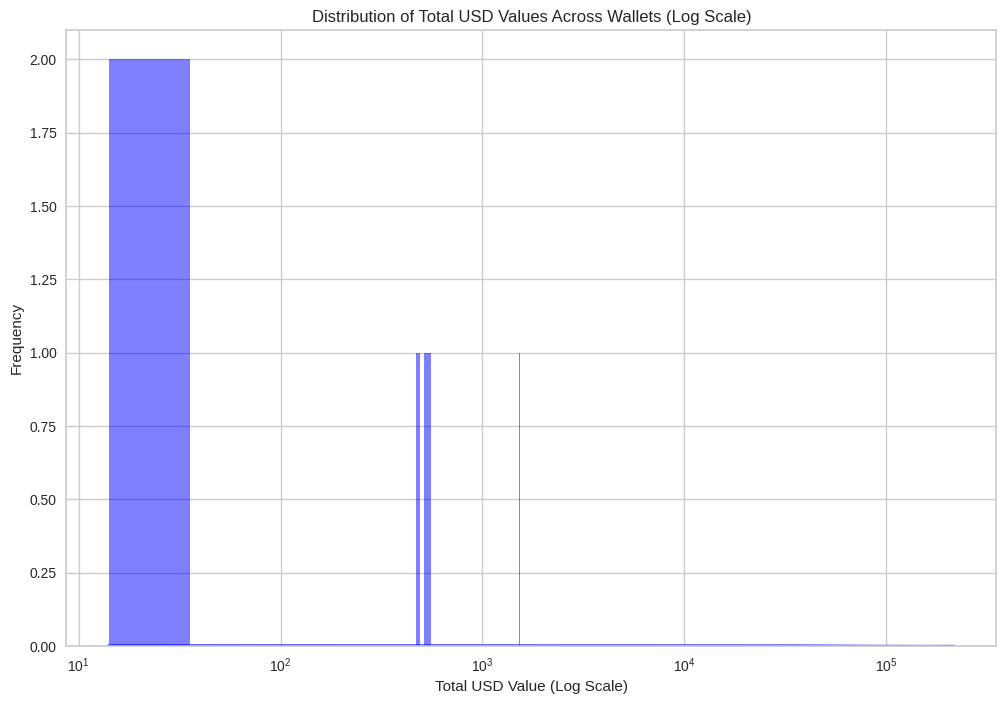

In [ ]:
totalUSD = result_df.groupby('Wallet Address')['USD Value'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.histplot(totalUSD['USD Value'], bins=10000, color='blue', kde=True)
plt.title('Distribution of Total USD Values Across Wallets (Log Scale)')
plt.xlabel('Total USD Value (Log Scale)')
plt.xscale('log')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-859e8cebe31b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_tokens_by_wallets.index, y=common_tokens_by_wallets.values, palette='viridis')


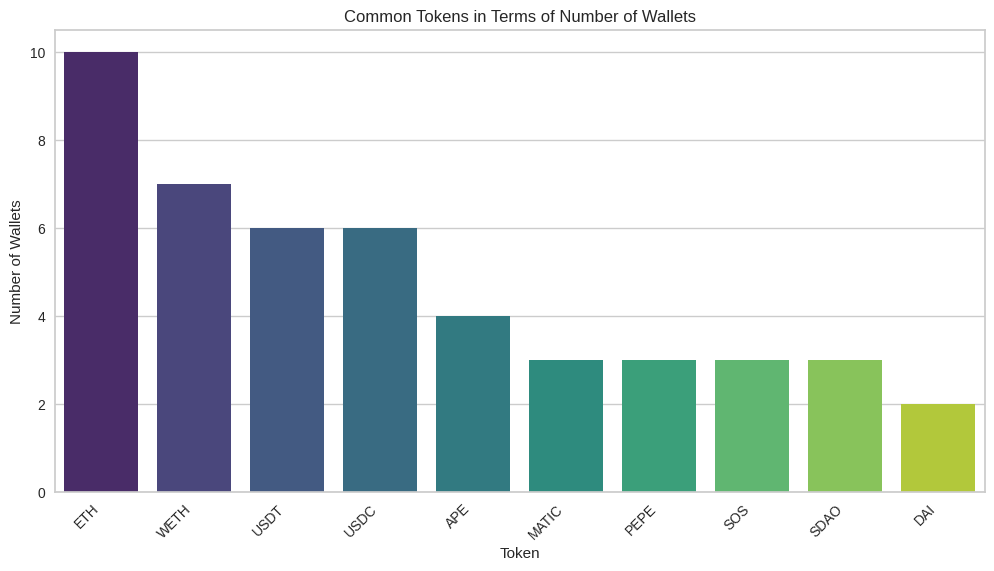

In [ ]:
# Common tokens in terms of the number of wallets
plt.figure(figsize=(12, 6))
common_tokens_by_wallets = result_df['Coin'].value_counts().head(10)
sns.barplot(x=common_tokens_by_wallets.index, y=common_tokens_by_wallets.values, palette='viridis')
plt.title('Common Tokens in Terms of Number of Wallets')
plt.xlabel('Token')
plt.ylabel('Number of Wallets')
plt.xticks(rotation=45, ha='right')
plt.show()


## **Dataset Aggregation**

### **Aggregating the Full Transactions and Token Balance Datasets for a Final Dataset**

In [ ]:
# Step 3: Convert relevant columns to numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['gas'] = pd.to_numeric(df['gas'], errors='coerce')
df['gasPrice'] = pd.to_numeric(df['gasPrice'], errors='coerce')

# Step 4: Aggregate Transaction Data
transaction_agg = df.groupby('origin').agg({
    'value': ['sum', 'mean', 'min', 'max'],
    'gas': ['sum'],
    'gasPrice': ['mean', 'sum', 'min', 'max']
}).reset_index()

transaction_agg.columns = ['wallet_address',
                           'total_value', 'avg_value', 'min_value', 'max_value',
                           'total_gas',
                           'avg_gasPrice', 'total_gasPrice', 'min_gasPrice', 'max_gasPrice']

# Step 5: Aggregate Function Counts
function_counts = df.groupby(['origin', 'functionName']).size().unstack(fill_value=0)
function_counts.columns = [f'function_count_{col}' for col in function_counts.columns]

# Step 6: Calculate Function Proportions
function_proportions = function_counts.div(function_counts.sum(axis=1), axis=0)
function_proportions.columns = [f'function_proportion_{col}' for col in function_proportions.columns]

# Step 7: Calculate Function Diversity
function_diversity = df.groupby('origin')['functionName'].nunique().reset_index()
function_diversity.columns = ['wallet_address', 'function_diversity']

# Step 8: Convert relevant columns to numeric in token balances
result_df['USD Value'] = pd.to_numeric(result_df['USD Value'], errors='coerce')

# Step 9: Aggregate Token Balances
token_balance_agg = result_df.groupby('Wallet Address').agg({
    'USD Value': ['sum', 'mean', 'min', 'max'],
    'Coin': 'nunique'
}).reset_index()

token_balance_agg.columns = ['wallet_address',
                             'total_usd_value', 'avg_usd_value', 'min_usd_value', 'max_usd_value',
                             'unique_coins']

# Step 10: Calculate First and Last Transaction Dates
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='s')
first_last_dates = df.groupby('origin')['timeStamp'].agg(['min', 'max']).reset_index()
first_last_dates.columns = ['wallet_address', 'first_transaction_date', 'last_transaction_date']

# Step 11: Merge All Aggregated Data
final_agg = transaction_agg.merge(function_counts.reset_index(), left_on='wallet_address', right_on='origin', how='left')
final_agg = final_agg.merge(function_proportions.reset_index(), left_on='wallet_address', right_on='origin', how='left')
final_agg = final_agg.merge(function_diversity, on='wallet_address', how='left')
final_agg = final_agg.merge(token_balance_agg, on='wallet_address', how='left')
final_agg = final_agg.merge(first_last_dates, on='wallet_address', how='left')

final_agg['activity_duration'] = (final_agg['last_transaction_date'] - final_agg['first_transaction_date']).dt.days
# Calculate recency (days since last transaction)
today = datetime.now()
final_agg['recency'] = (today - final_agg['last_transaction_date']).dt.days

# Display the resulting DataFrame
final_agg.head()

wallet_address  total_value  avg_value  \
0  0x08ff9bc346424ca445dcec2b6153ab4e7e73ccef    30.539869   0.321472   
1  0x0eeffc89d0411a1f1457c5d8ecb33e39e0538812   120.059456   0.285856   
2  0x3967454fdd427a08c1e05bf638604ee25f379dbe     8.136752   0.043052   
3  0x80d3ab7f834f786cab110bea9e8a96d45b2dc9c2   166.532093   0.097616   
4  0xae3c6db46f0d56afd8ff048872a928b6b53a25c6     0.560001   0.112000   

   min_value  max_value  total_gas  avg_gasPrice  total_gasPrice  \
0   0.000000   5.000000   12568555  1.310895e+11  12453502342349   
1   0.000000   8.000000   80168132  2.677163e+10  11244084306533   
2   0.000000   0.737897   27122816  2.590533e+10   4896108262649   
3   0.000000   6.000000  369590717  3.260611e+10  55626031609144   
4   0.042277   0.275977     733763  2.641524e+10    132076218250   

   min_gasPrice   max_gasPrice  ... function_diversity  total_usd_value  \
0   10498799631  5192471003369  ...                 25      1521.659137   
1    6287462196   208115552038  ...                 17     32197.841800   
2    5000000000   112748998418  ...                 28       470.927046   
3    4218882675   541817965440  ...                 63      8381.703230   
4   10153323686    47572969897  ...                  3       523.097660   

   avg_usd_value  min_usd_value  max_usd_value  unique_coins  \
0     117.050703        0.00000      988.97034            13   
1    4024.730225        0.00000    21810.00800             8   
2      23.546352        0.00000      427.62808            20   
3     174.618817        0.00000     6651.23340            48   
4     261.548830        7.65619      515.44147             2   

   first_transaction_date  last_transaction_date  activity_duration  recency  
0     2021-08-23 08:29:45    2023-12-08 13:02:35                837      164  
1     2022-10-12 01:56:11    2023-12-08 12:57:11                422      164  
2     2021-07-03 17:28:35    2023-12-08 12:53:47                887      164  
3     2021-05-23 21:22:27    2023-12-08 12:56:11                928      164  
4     2023-10-17 18:15:11    2023-12-08 12:53:47                 51      164  

[5 rows x 244 columns]

In [ ]:
final_agg.shape

(10, 244)

##**Correlation Matrices**

In [ ]:
# Step 3: Convert relevant columns to numeric
df1['value'] = pd.to_numeric(df1['value'], errors='coerce')
df1['gas'] = pd.to_numeric(df1['gas'], errors='coerce')
df1['gasPrice'] = pd.to_numeric(df1['gasPrice'], errors='coerce')

# Step 4: Aggregate Transaction Data
transaction_agg = df1.groupby('origin').agg({
    'value': ['sum', 'mean', 'min', 'max'],
    'gas': ['sum'],
    'gasPrice': ['mean', 'sum', 'min', 'max']
}).reset_index()

transaction_agg.columns = ['wallet_address',
                           'total_value', 'avg_value', 'min_value', 'max_value',
                           'total_gas',
                           'avg_gasPrice', 'total_gasPrice', 'min_gasPrice', 'max_gasPrice']

# Step 5: Aggregate Function Counts
function_counts = df1.groupby(['origin', 'functionName']).size().unstack(fill_value=0)
function_counts.columns = [f'function_count_{col}' for col in function_counts.columns]

# Step 6: Calculate Function Proportions
function_proportions = function_counts.div(function_counts.sum(axis=1), axis=0)
function_proportions.columns = [f'function_proportion_{col}' for col in function_proportions.columns]

# Step 7: Calculate Function Diversity
function_diversity = df1.groupby('origin')['functionName'].nunique().reset_index()
function_diversity.columns = ['wallet_address', 'function_diversity']

# Step 8: Convert relevant columns to numeric in token balances
result_df['USD Value'] = pd.to_numeric(result_df['USD Value'], errors='coerce')

# Step 9: Aggregate Token Balances
token_balance_agg = result_df.groupby('Wallet Address').agg({
    'USD Value': ['sum', 'mean', 'min', 'max'],
    'Coin': 'nunique'
}).reset_index()

token_balance_agg.columns = ['wallet_address',
                             'total_usd_value', 'avg_usd_value', 'min_usd_value', 'max_usd_value',
                             'unique_coins']

# Step 10: Calculate First and Last Transaction Dates
df1['timeStamp'] = pd.to_datetime(df1['timeStamp'], unit='s')
first_last_dates = df1.groupby('origin')['timeStamp'].agg(['min', 'max']).reset_index()
first_last_dates.columns = ['wallet_address', 'first_transaction_date', 'last_transaction_date']

# Step 11: Merge All Aggregated Data
final_agg = transaction_agg.merge(function_counts.reset_index(), left_on='wallet_address', right_on='origin', how='left')
final_agg = final_agg.merge(function_proportions.reset_index(), left_on='wallet_address', right_on='origin', how='left')
final_agg = final_agg.merge(function_diversity, on='wallet_address', how='left')
final_agg = final_agg.merge(token_balance_agg, on='wallet_address', how='left')
final_agg = final_agg.merge(first_last_dates, on='wallet_address', how='left')

final_agg['activity_duration'] = (final_agg['last_transaction_date'] - final_agg['first_transaction_date']).dt.days
# Calculate recency (days since last transaction)
today = datetime.now()
final_agg['recency'] = (today - final_agg['last_transaction_date']).dt.days
# Display the resulting DataFrame
final_agg.head()

wallet_address  total_value  avg_value  \
0  0x08ff9bc346424ca445dcec2b6153ab4e7e73ccef    30.539869   0.321472   
1  0x0eeffc89d0411a1f1457c5d8ecb33e39e0538812   120.059456   0.285856   
2  0x3967454fdd427a08c1e05bf638604ee25f379dbe     8.136752   0.043052   
3  0x80d3ab7f834f786cab110bea9e8a96d45b2dc9c2   166.532093   0.097616   
4  0xae3c6db46f0d56afd8ff048872a928b6b53a25c6     0.560001   0.112000   

   min_value  max_value  total_gas  avg_gasPrice  total_gasPrice  \
0   0.000000   5.000000   12568555  1.310895e+11  12453502342349   
1   0.000000   8.000000   80168132  2.677163e+10  11244084306533   
2   0.000000   0.737897   27122816  2.590533e+10   4896108262649   
3   0.000000   6.000000  369590717  3.260611e+10  55626031609144   
4   0.042277   0.275977     733763  2.641524e+10    132076218250   

   min_gasPrice   max_gasPrice  ... function_diversity  total_usd_value  \
0   10498799631  5192471003369  ...                 25      1521.659137   
1    6287462196   208115552038  ...                 17     32197.841800   
2    5000000000   112748998418  ...                 28       470.927046   
3    4218882675   541817965440  ...                 63      8381.703230   
4   10153323686    47572969897  ...                  3       523.097660   

   avg_usd_value  min_usd_value  max_usd_value  unique_coins  \
0     117.050703        0.00000      988.97034            13   
1    4024.730225        0.00000    21810.00800             8   
2      23.546352        0.00000      427.62808            20   
3     174.618817        0.00000     6651.23340            48   
4     261.548830        7.65619      515.44147             2   

   first_transaction_date  last_transaction_date  activity_duration  recency  
0     2021-08-23 08:29:45    2023-12-08 13:02:35                837      164  
1     2022-10-12 01:56:11    2023-12-08 12:57:11                422      164  
2     2021-07-03 17:28:35    2023-12-08 12:53:47                887      164  
3     2021-05-23 21:22:27    2023-12-08 12:56:11                928      164  
4     2023-10-17 18:15:11    2023-12-08 12:53:47                 51      164  

[5 rows x 244 columns]

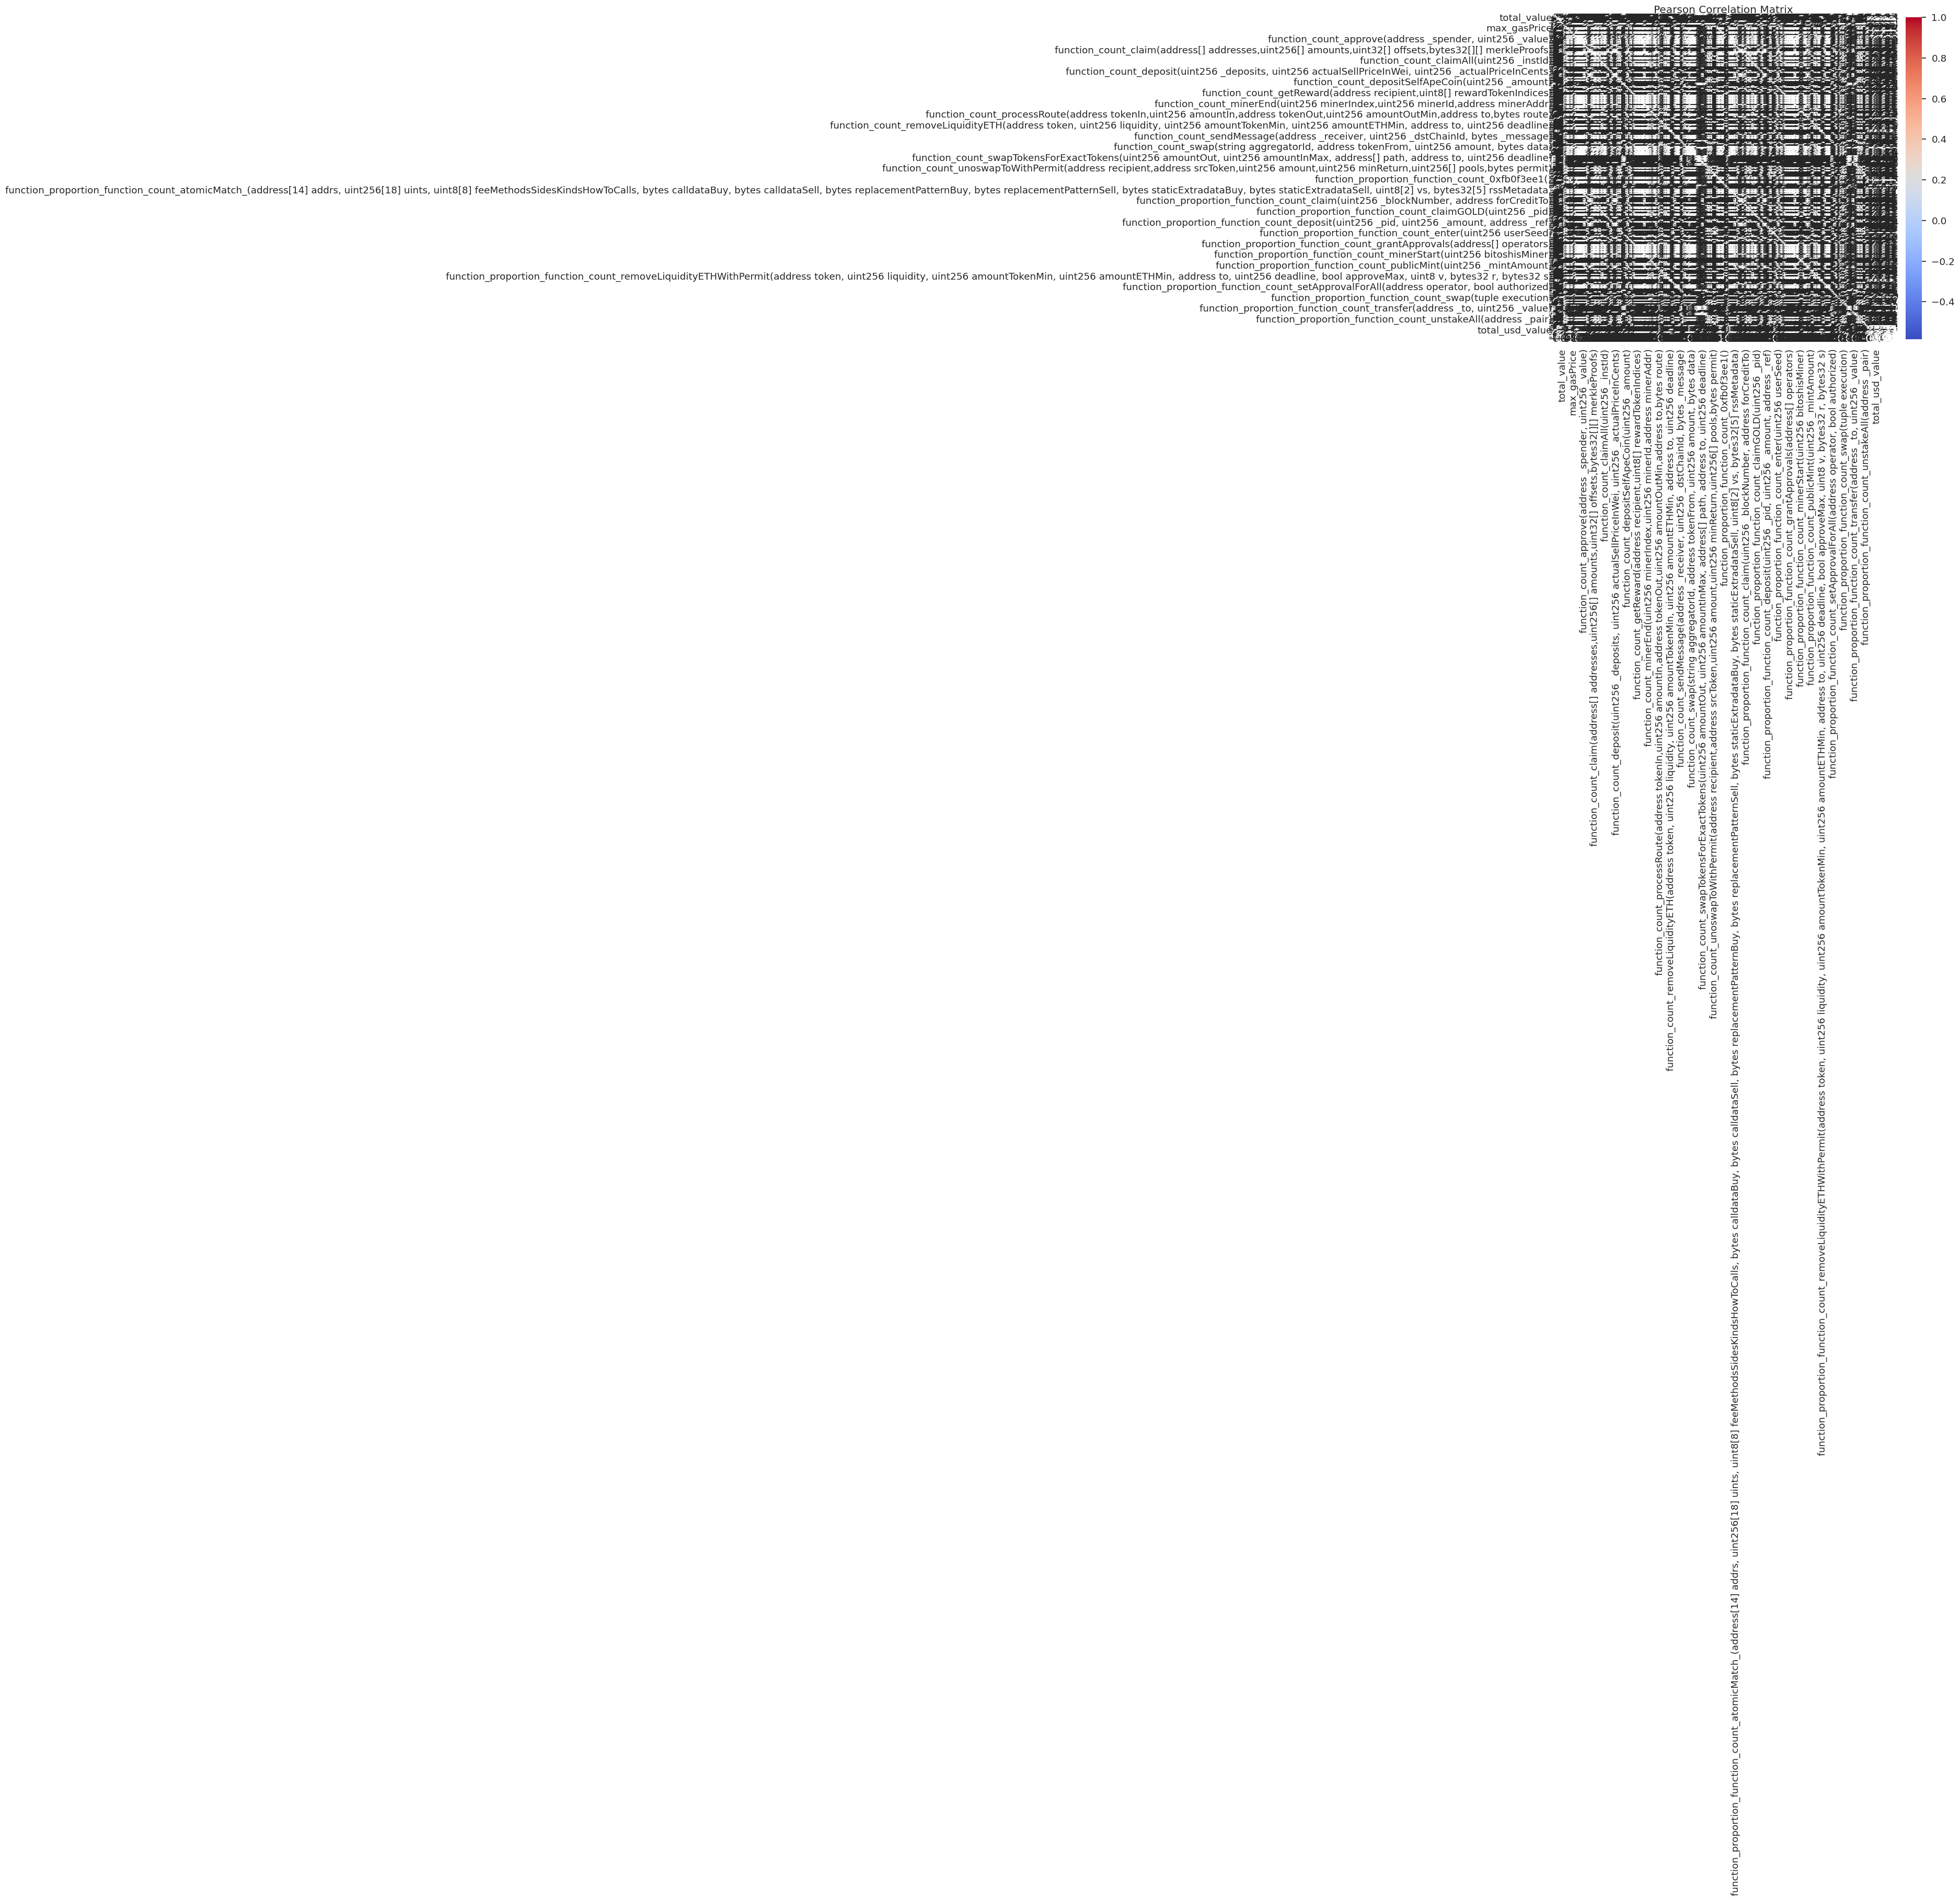

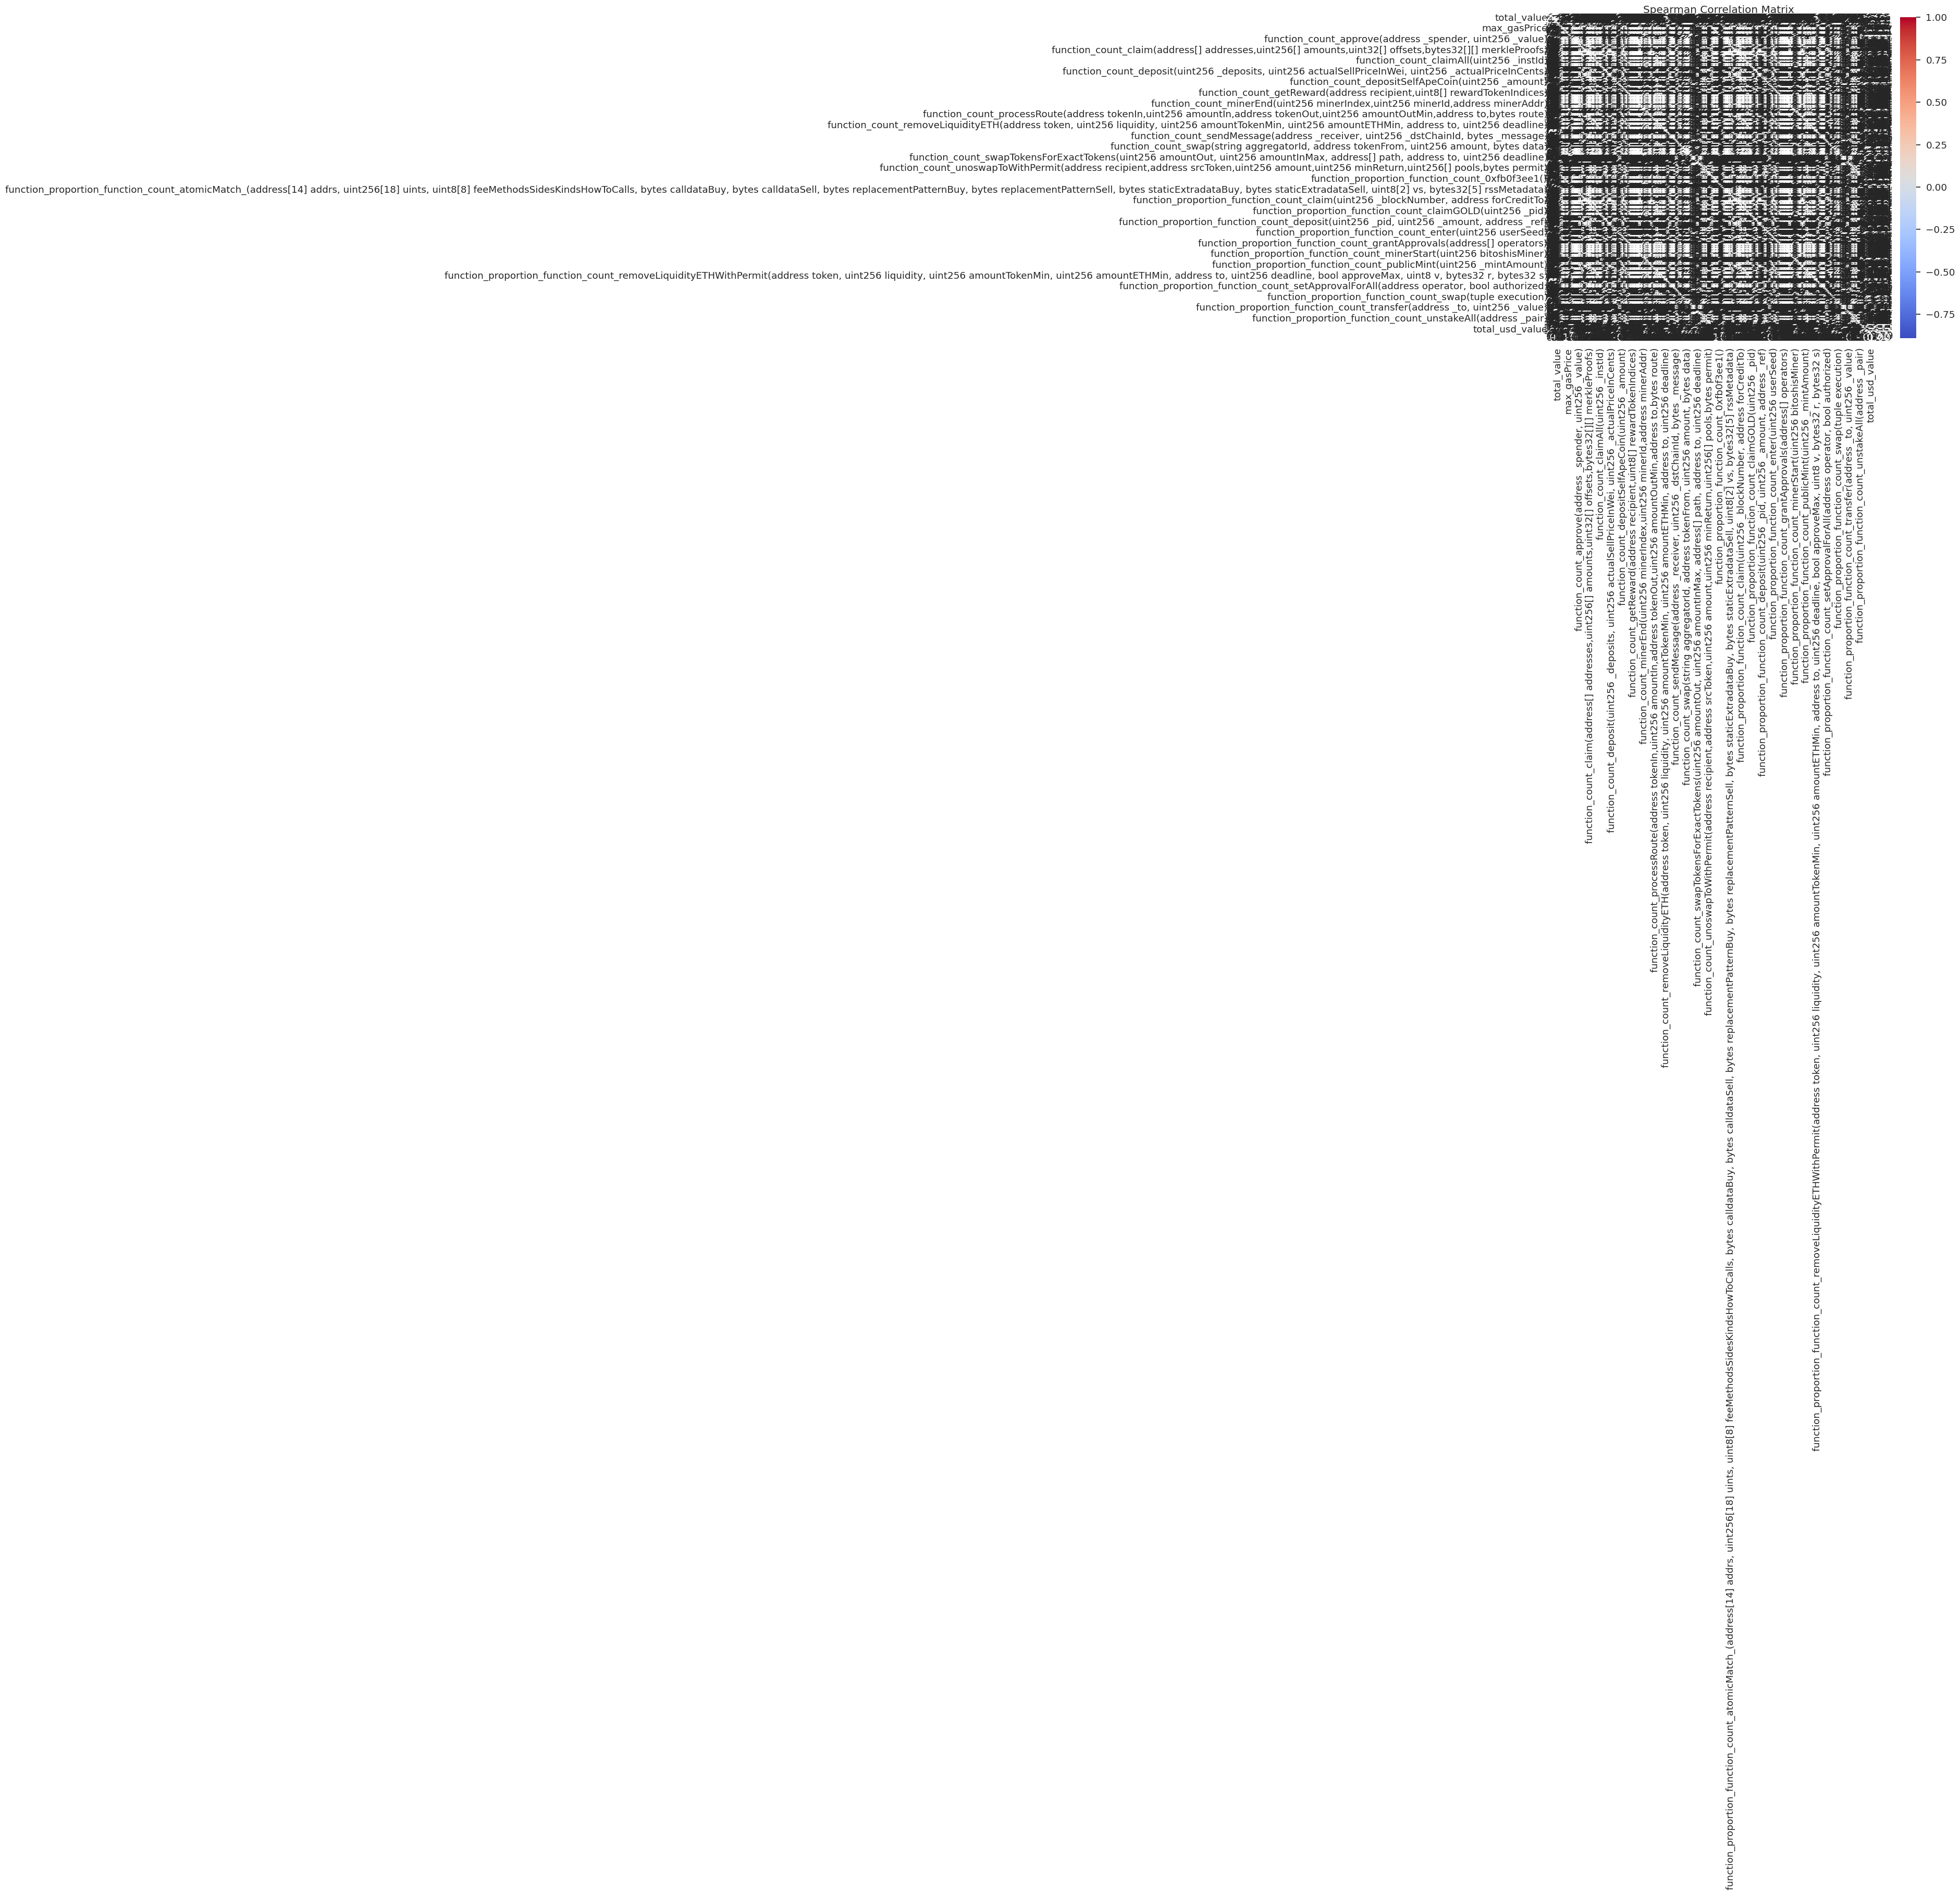

In [ ]:
# Selecting numeric columns from final_agg
numeric_columns = final_agg.select_dtypes(include=['float64', 'int64']).columns
numeric_data = final_agg[numeric_columns]

# Calculate Pearson and Spearman correlations
corr_pearson = numeric_data.corr(method='pearson')
corr_spearman = numeric_data.corr(method='spearman')

# Plotting Pearson correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# Plotting Spearman correlation matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

# **Classical Clustering Analysis**

###**Standardize the Data**

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

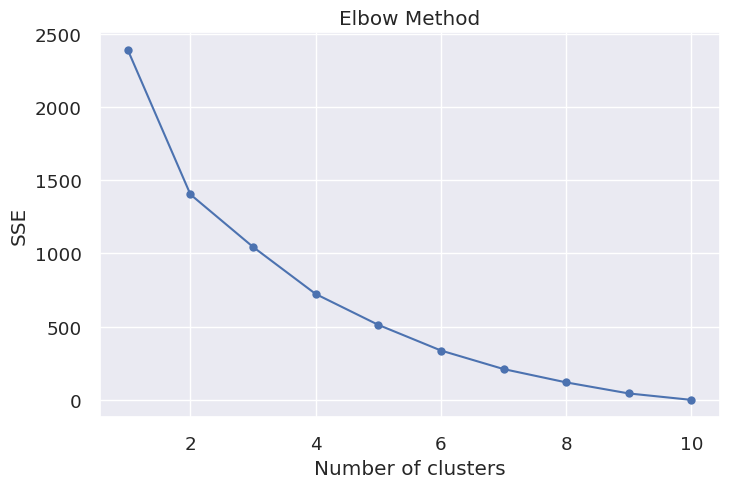

Silhouette Score for K-Means: 0.44


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Silhouette Score for K-Means
optimal_k = 2  # Assume 5 clusters as an example
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
silhouette_avg = silhouette_score(data_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_avg:.2f}')

In [ ]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(data_scaled)
silhouette_avg = silhouette_score(data_scaled, agg_labels)
print(f'Silhouette Score for Agglomerative Clustering: {silhouette_avg:.2f}')

Silhouette Score for Agglomerative Clustering: 0.44


In [ ]:
# Perform DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(numeric_data_scaled)
# Filter out noise points for silhouette score calculation
filtered_data = numeric_data_scaled[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]
silhouette_avg = silhouette_score(filtered_data, filtered_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_avg:.2f}')

In [ ]:
from sklearn.mixture import GaussianMixture

# Perform GMM
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(numeric_data_scaled)
silhouette_avg = silhouette_score(numeric_data_scaled, gmm_labels)
print(f'Silhouette Score for GMM: {silhouette_avg:.2f}')


NameError: name 'optimal_k' is not defined